In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from itertools import islice
from heapq import nlargest

df = pd.read_csv('clean_data_v2.csv')

In [2]:
# Print first 100 rows of df
df.head(1000)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,notes,participant_age,participant_average_age,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,Julian Sims under investigation: Four Shot and...,0::20,20.00,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,0::Unknown,0::Unknown
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,Four Shot; One Killed; Unidentified shooter in...,0::20,20.00,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Unknown,0::25||1::31||2::33||3::34||4::33,31.20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Unknown,0::29||1::33||2::56||3::33,37.75,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,31.25,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::Unknown,0::23||1::23||2::33||3::55,33.50,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72,11
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::Unknown,0::51||1::40||2::9||3::5||4::2||5::15,20.33,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10,14
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,Unprovoked drive-by results in multiple teens ...,0::Unknown,NaN,0::Unknown,0::Male||1::Male||2::Male||3::Male||4::Male

In [3]:
print("Average Injured: {}".format(round(df["n_injured"].mean(),2)))
print("Average Killed: {}".format(round(df["n_killed"].mean(),2)))
print("Average Age of Participants: {}".format(round(df["participant_average_age"].mean(),2)))

Average Injured: 0.49
Average Killed: 0.25
Average Age of Participants: 30.0


In [4]:
# All unique state values
States = df["state"].values

# Removing duplicates and sorting list
States = sorted(list(set(States)))

In [5]:
for statename in States:
    print("Averages in {}:".format(statename))
    print("Injured: {}".format(round(df[df['state'] == statename]["n_injured"].mean(),2)))
    print("Killed: {}".format(round(df[df['state'] == statename]["n_killed"].mean(),2)))
    print("Age: {}".format(round(df[df['state'] == statename]["participant_average_age"].mean(),2)))
    print()

Averages in Alabama:
Injured: 0.55
Killed: 0.34
Age: 31.02

Averages in Alaska:
Injured: 0.24
Killed: 0.2
Age: 31.99

Averages in Arizona:
Injured: 0.47
Killed: 0.47
Age: 32.36

Averages in Arkansas:
Injured: 0.47
Killed: 0.27
Age: 31.69

Averages in California:
Injured: 0.47
Killed: 0.34
Age: 30.76

Averages in Colorado:
Injured: 0.35
Killed: 0.25
Age: 32.12

Averages in Connecticut:
Injured: 0.41
Killed: 0.11
Age: 29.67

Averages in Delaware:
Injured: 0.51
Killed: 0.13
Age: 27.55

Averages in District of Columbia:
Injured: 0.44
Killed: 0.14
Age: 27.92

Averages in Florida:
Injured: 0.47
Killed: 0.26
Age: 30.85

Averages in Georgia:
Injured: 0.45
Killed: 0.28
Age: 29.77

Averages in Hawaii:
Injured: 0.29
Killed: 0.22
Age: 35.09

Averages in Idaho:
Injured: 0.23
Killed: 0.25
Age: 34.34

Averages in Illinois:
Injured: 0.77
Killed: 0.19
Age: 26.99

Averages in Indiana:
Injured: 0.51
Killed: 0.27
Age: 30.11

Averages in Iowa:
Injured: 0.33
Killed: 0.11
Age: 28.88

Averages in Kansas:
Inju

In [6]:
incident_char = df["incident_characteristics"].values
incident_char = list(set(incident_char))

In [7]:
# converts a csv dictionary to a list in python

def csv_dict_to_py_list(csv_string):
    if '::' in csv_string:
        py_dict = dict((key, value) for key, value in (item.split('::') for item in csv_string.split('||')))
    elif ':' in csv_string:
        py_dict = dict((key, value) for key, value in (item.split(':') for item in csv_string.split('|')))
    return list(py_dict.values())

Males involved in gunviolence: 309090
Females involved in gunviolence: 43172


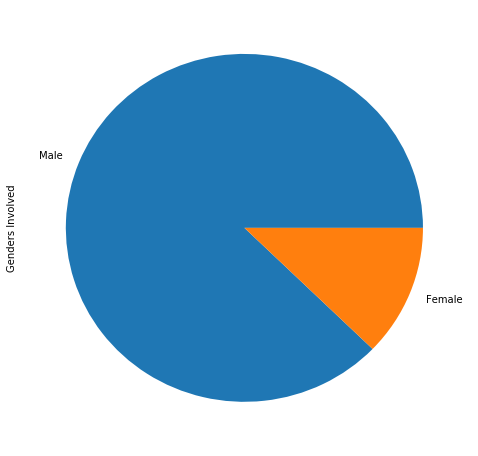

In [8]:
# dropna skips empty values

participant_genders = df["participant_gender"].dropna()


male = 0
female = 0 

for participant_gender in participant_genders:
    participant_gender_list =  csv_dict_to_py_list(participant_gender)
    male += participant_gender_list.count("Male")
    female += participant_gender_list.count("Female")

print("Males involved in gunviolence: {}".format(male))
print("Females involved in gunviolence: {}".format(female))

series = pd.Series([male, female], index=['Male', 'Female'], name='Genders Involved')

series.plot.pie(figsize=(8, 8))

Suspects involved in gunviolence: 199263
Victims involved in gunviolence: 193060
Unknown involved in gunviolence: 24863


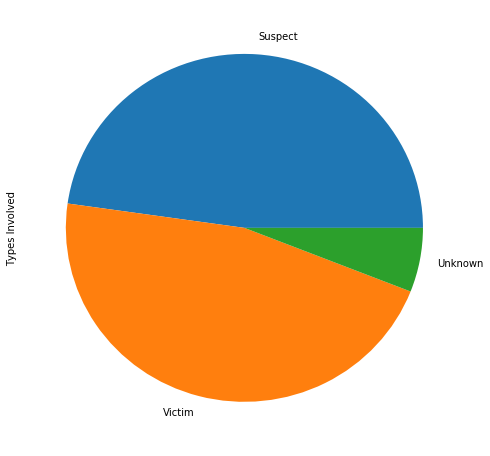

In [9]:
# dropna skips empty values

participant_type = df["participant_type"].dropna()


suspect = 0
victim = 0 
unknown = 0


for participant in participant_type:
    participant_list =  csv_dict_to_py_list(participant)
    suspect += participant_list.count("Subject-Suspect")
    victim += participant_list.count("Victim")
    unknown += participant_list.count("Unknown")

print("Suspects involved in gunviolence: {}".format(suspect))
print("Victims involved in gunviolence: {}".format(victim))
print("Unknown involved in gunviolence: {}".format(unknown))

series = pd.Series([suspect, victim, unknown], index=['Suspect', 'Victim', 'Unknown'], name='Types Involved')

series.plot.pie(figsize=(8, 8))

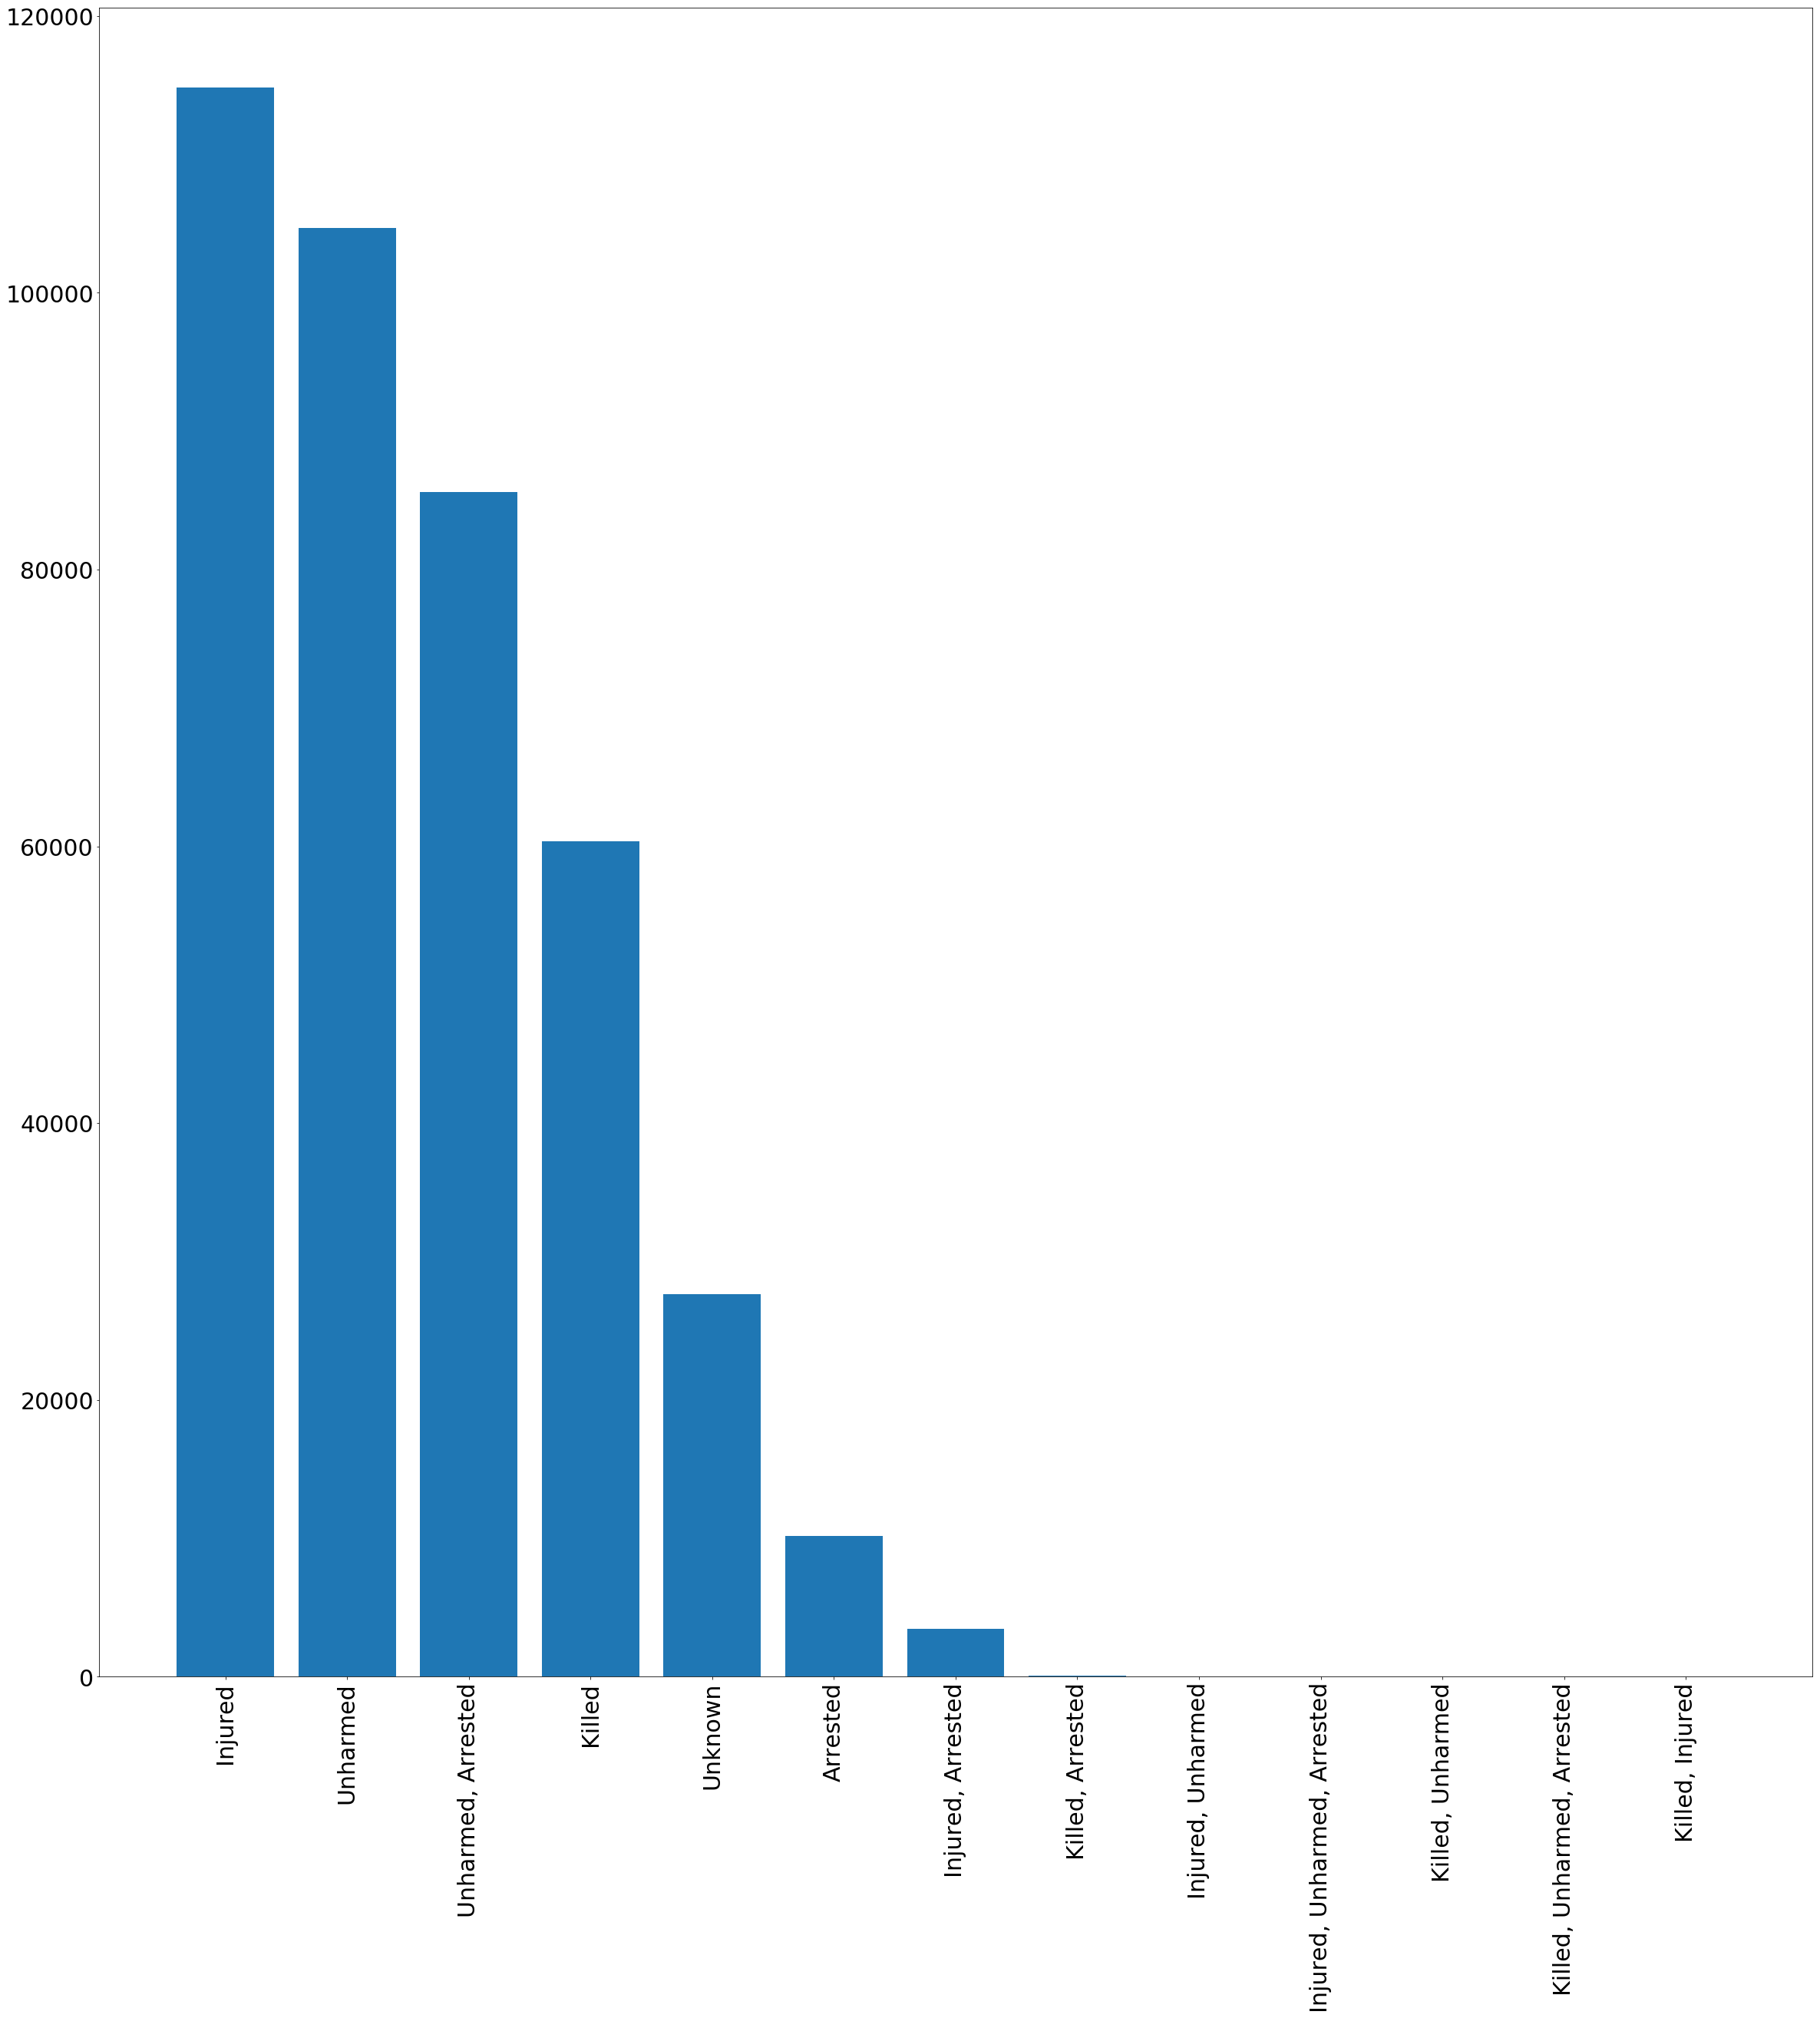

In [10]:
# dropna skips empty values
participant_status = df["participant_status"].dropna()

# empty list gun types
participant_list = [] 

# add all gun types to the list gun_types
for status in participant_status:
    status = csv_dict_to_py_list(status)
    participant_list.extend(status)

# count occurences in dictionary
D = dict((x,participant_list.count(x)) for x in set(participant_list))

# sort the dictionary by value size
D = dict(reversed(sorted(D.items(), key=operator.itemgetter(1))))

# plot figure
plt.figure(figsize=(40,40))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.yticks(size=30)
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical',size=30)
plt.show()

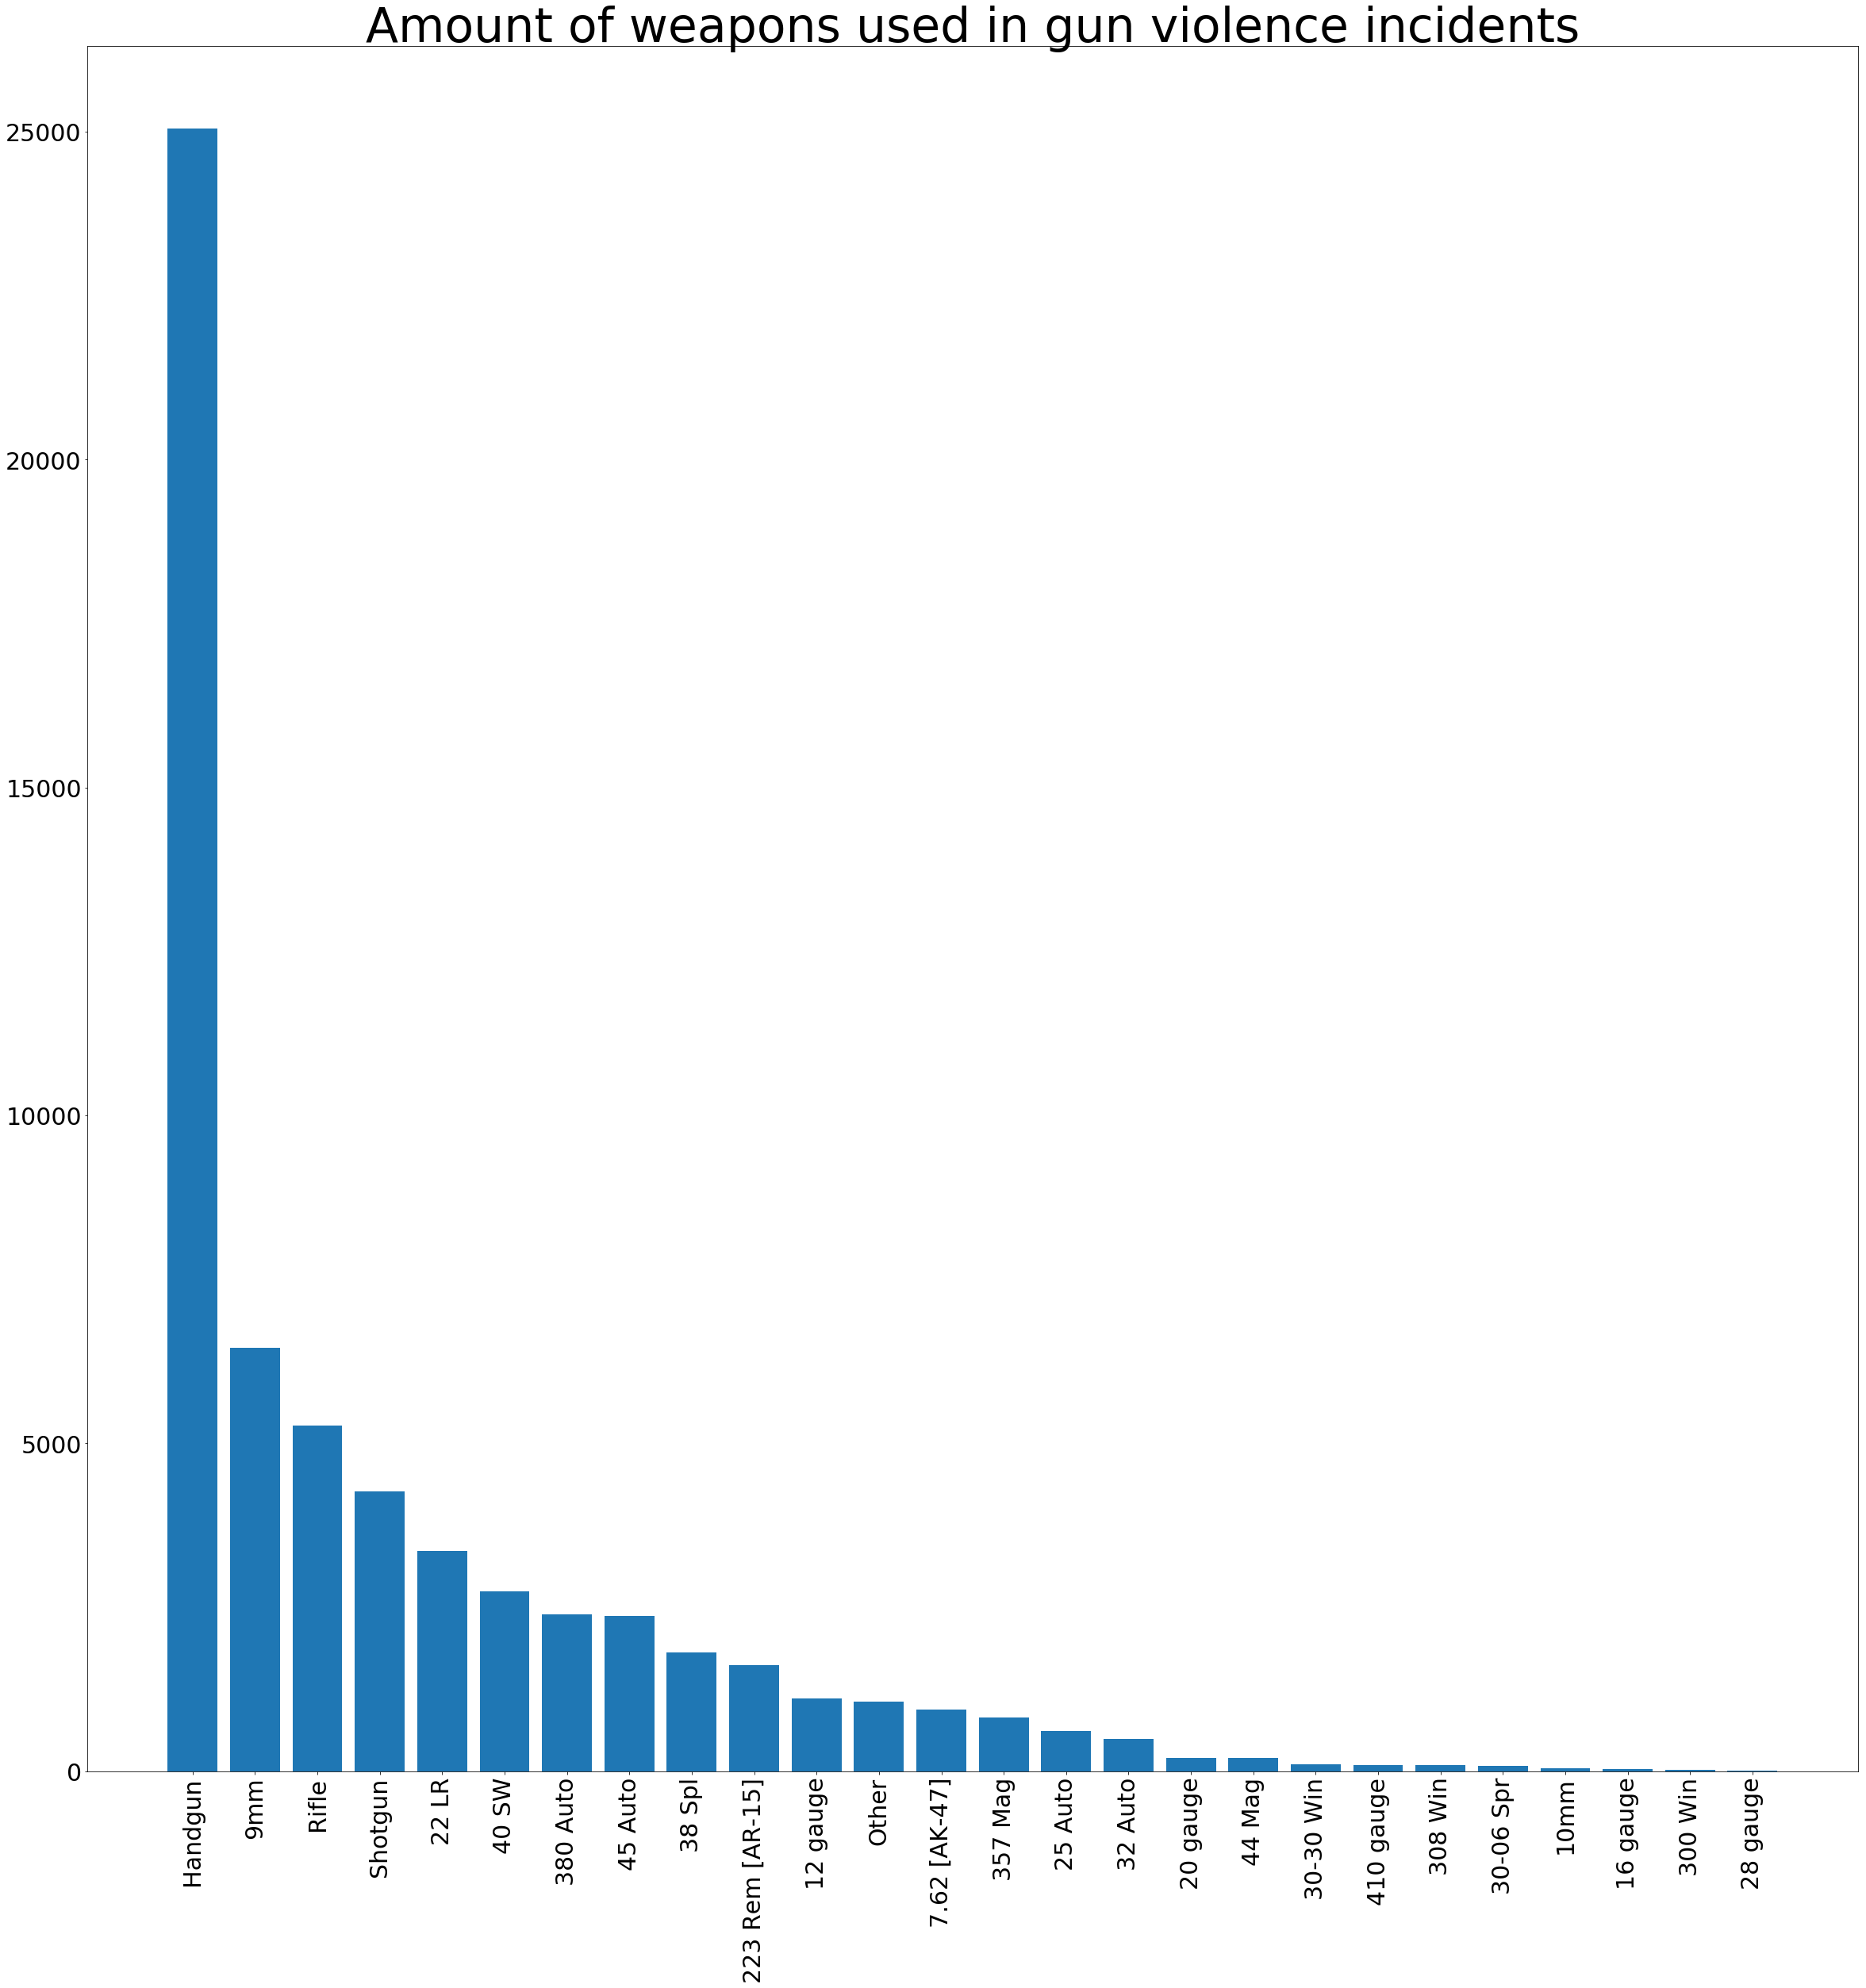

In [11]:
# dropna skips empty values
gun_type = df["gun_type"].dropna()

# empty list gun types
gun_types = [] 

# add all gun types to the list gun_types
for gun_t in gun_type:
    gun_t = csv_dict_to_py_list(gun_t)
    gun_types.extend(gun_t)

# count occurences in dictionary
D = dict((x,gun_types.count(x)) for x in set(gun_types))

# optional to remove Unknown from dict
del D['Unknown']

# sort the dictionary by value size
D = dict(reversed(sorted(D.items(), key=operator.itemgetter(1))))

# plot figure
plt.figure(figsize=(40,40))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.yticks(size=30)
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical',size=30)
plt.title('Amount of weapons used in gun violence incidents', fontsize=60)
plt.show()

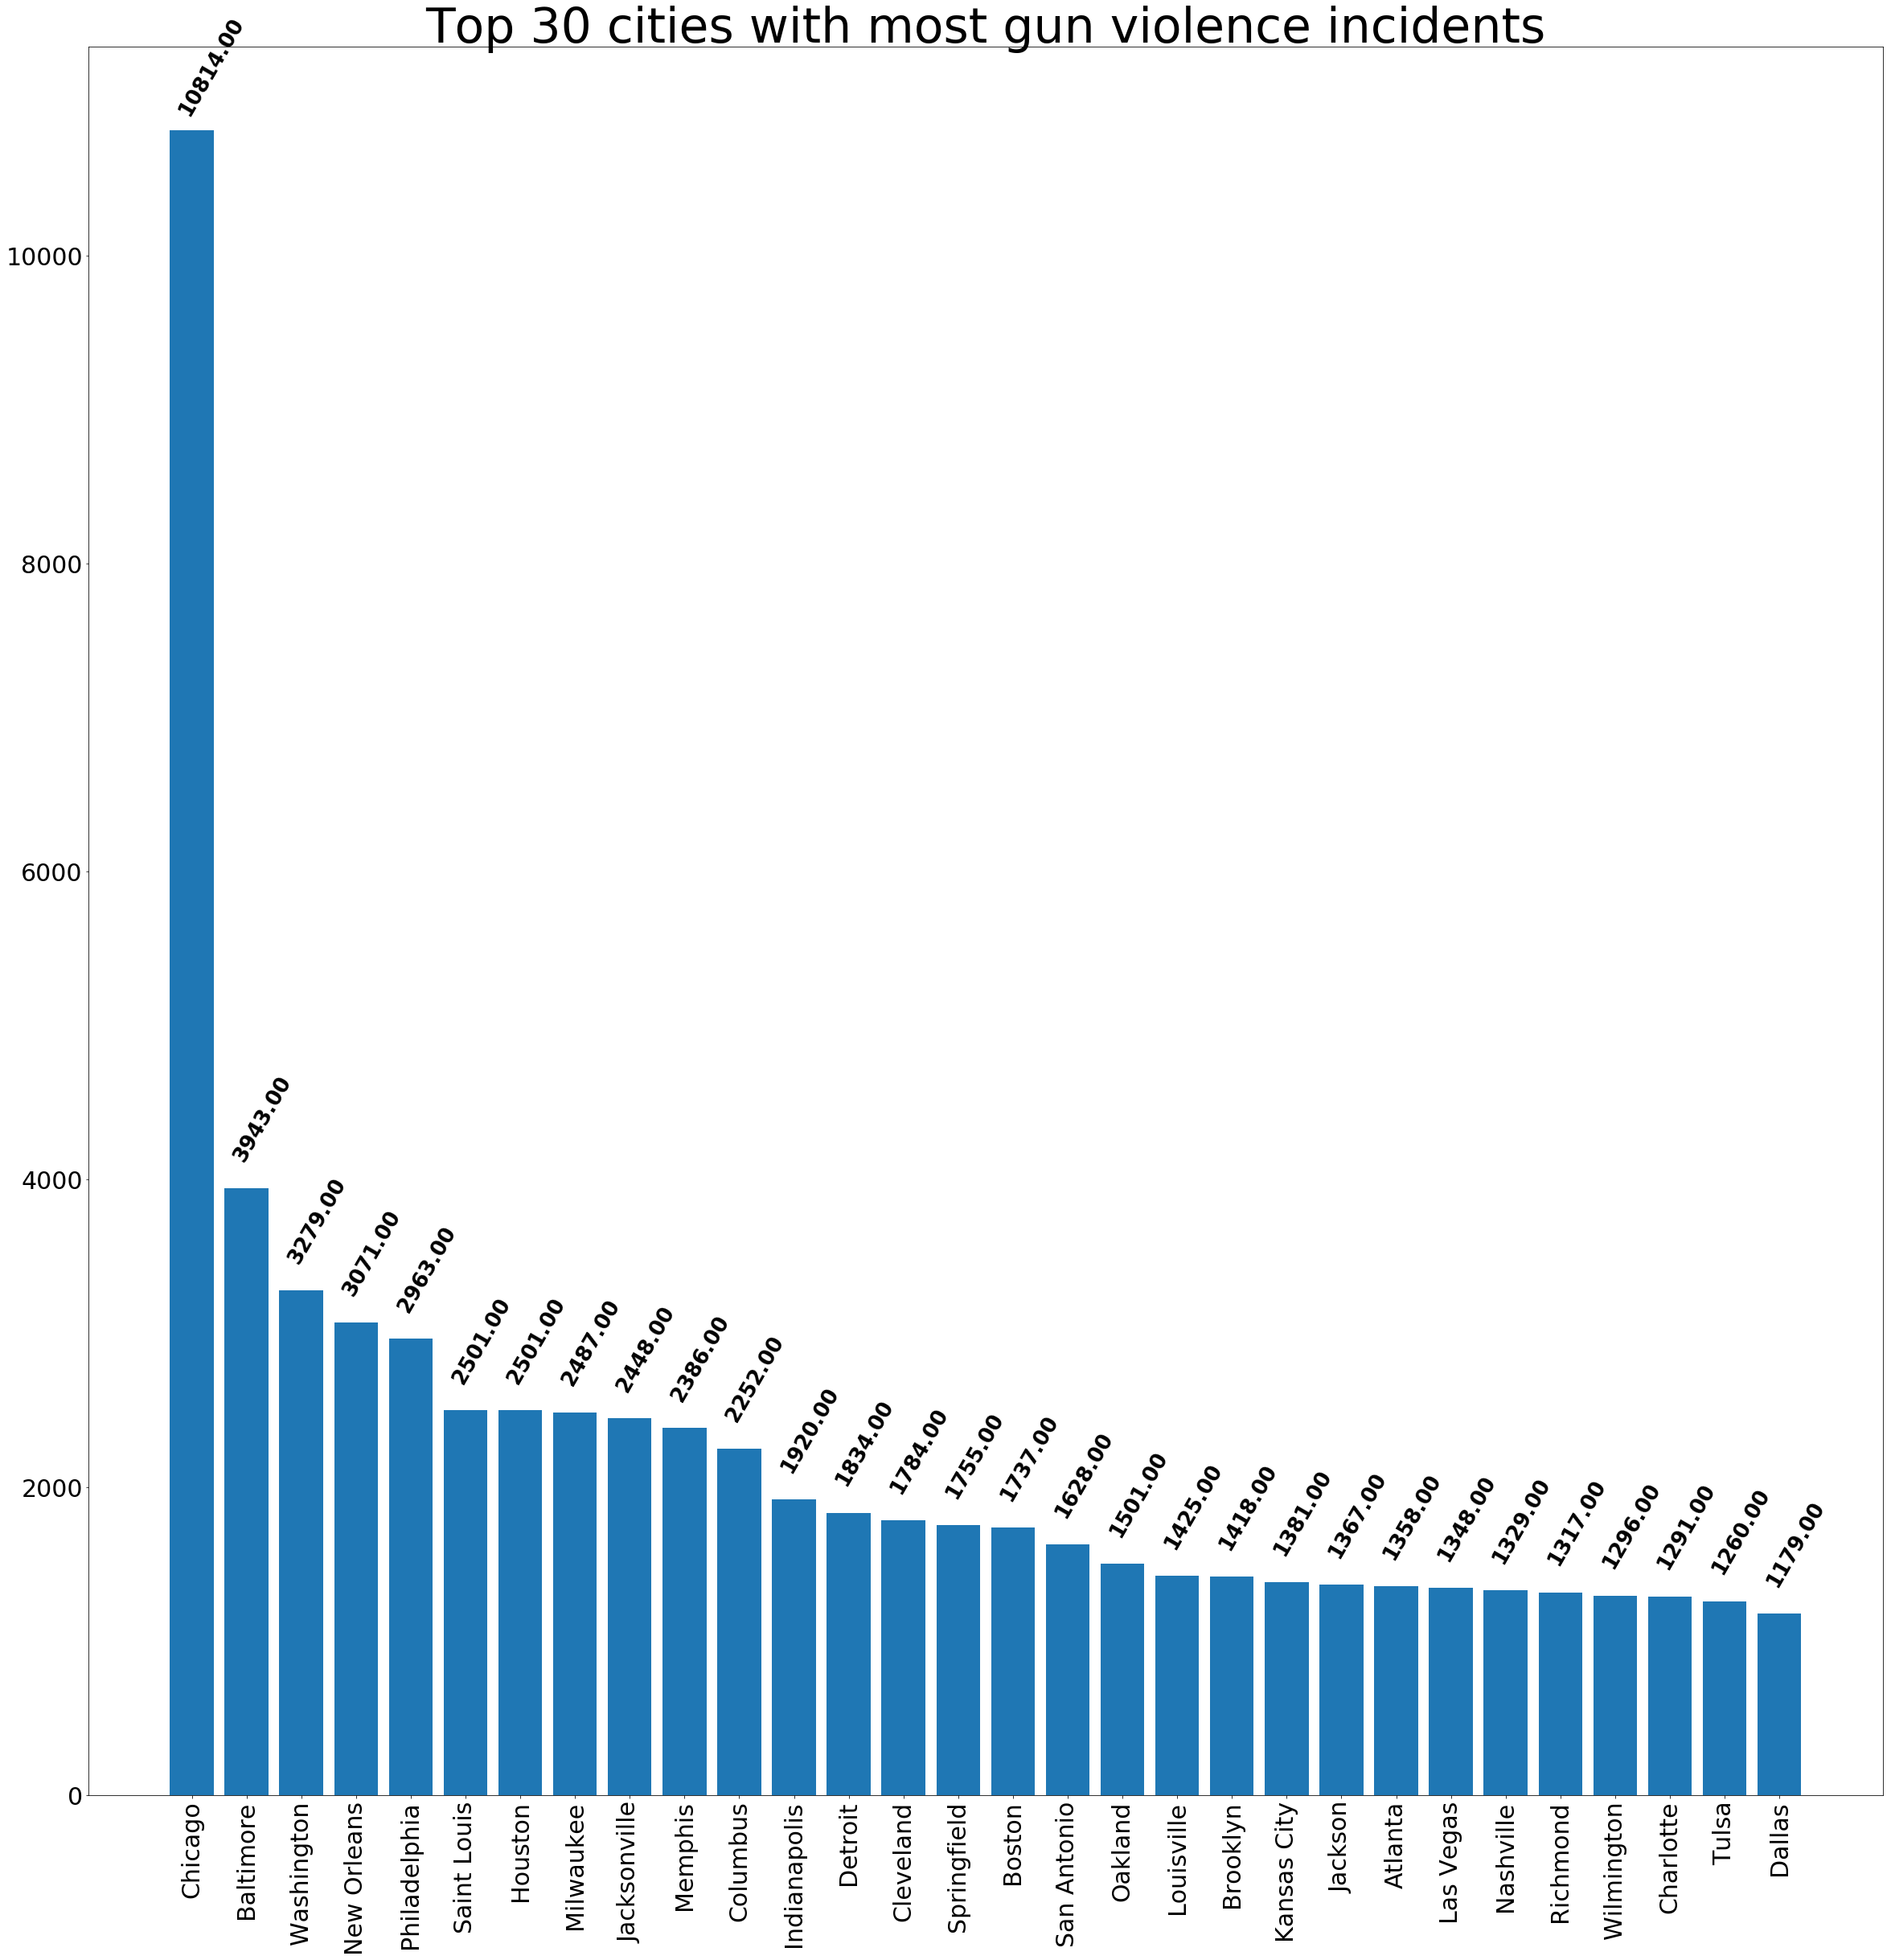

In [12]:
# dropna skips empty values
city_or_county = df["city_or_county"].dropna()

# empty list gun types
city_or_county_list = [] 

# add all gun types to the list gun_types
for citycounty in city_or_county:
    city_or_county_list.append(citycounty)

# count occurences in dictionary
city_crimes = dict((x,city_or_county_list.count(x)) for x in set(city_or_county_list))

# sort the dictionary by value size
city_crimes = dict(reversed(sorted(city_crimes.items(), key=operator.itemgetter(1))))

# take the top 30 biggest cities
city_crimes_top30 = {k: city_crimes[k] for k in list(city_crimes)[:30]}

# plot figure
plt.figure(figsize=(40,40))
plt.bar(range(len(city_crimes_top30)), list(city_crimes_top30.values()), align='center')
plt.yticks(size=30)

for i, v in enumerate(city_crimes_top30.values()):
    t = plt.text(i - 0.3, (v + 650), '{0:.2f}'.format(v), color='black', fontweight='bold', fontsize=26, rotation=60)
    
plt.title('Top 30 cities with most gun violence incidents', fontsize=60)
plt.xticks(range(len(city_crimes_top30)), list(city_crimes_top30.keys()), rotation='vertical',size=30)
plt.show()

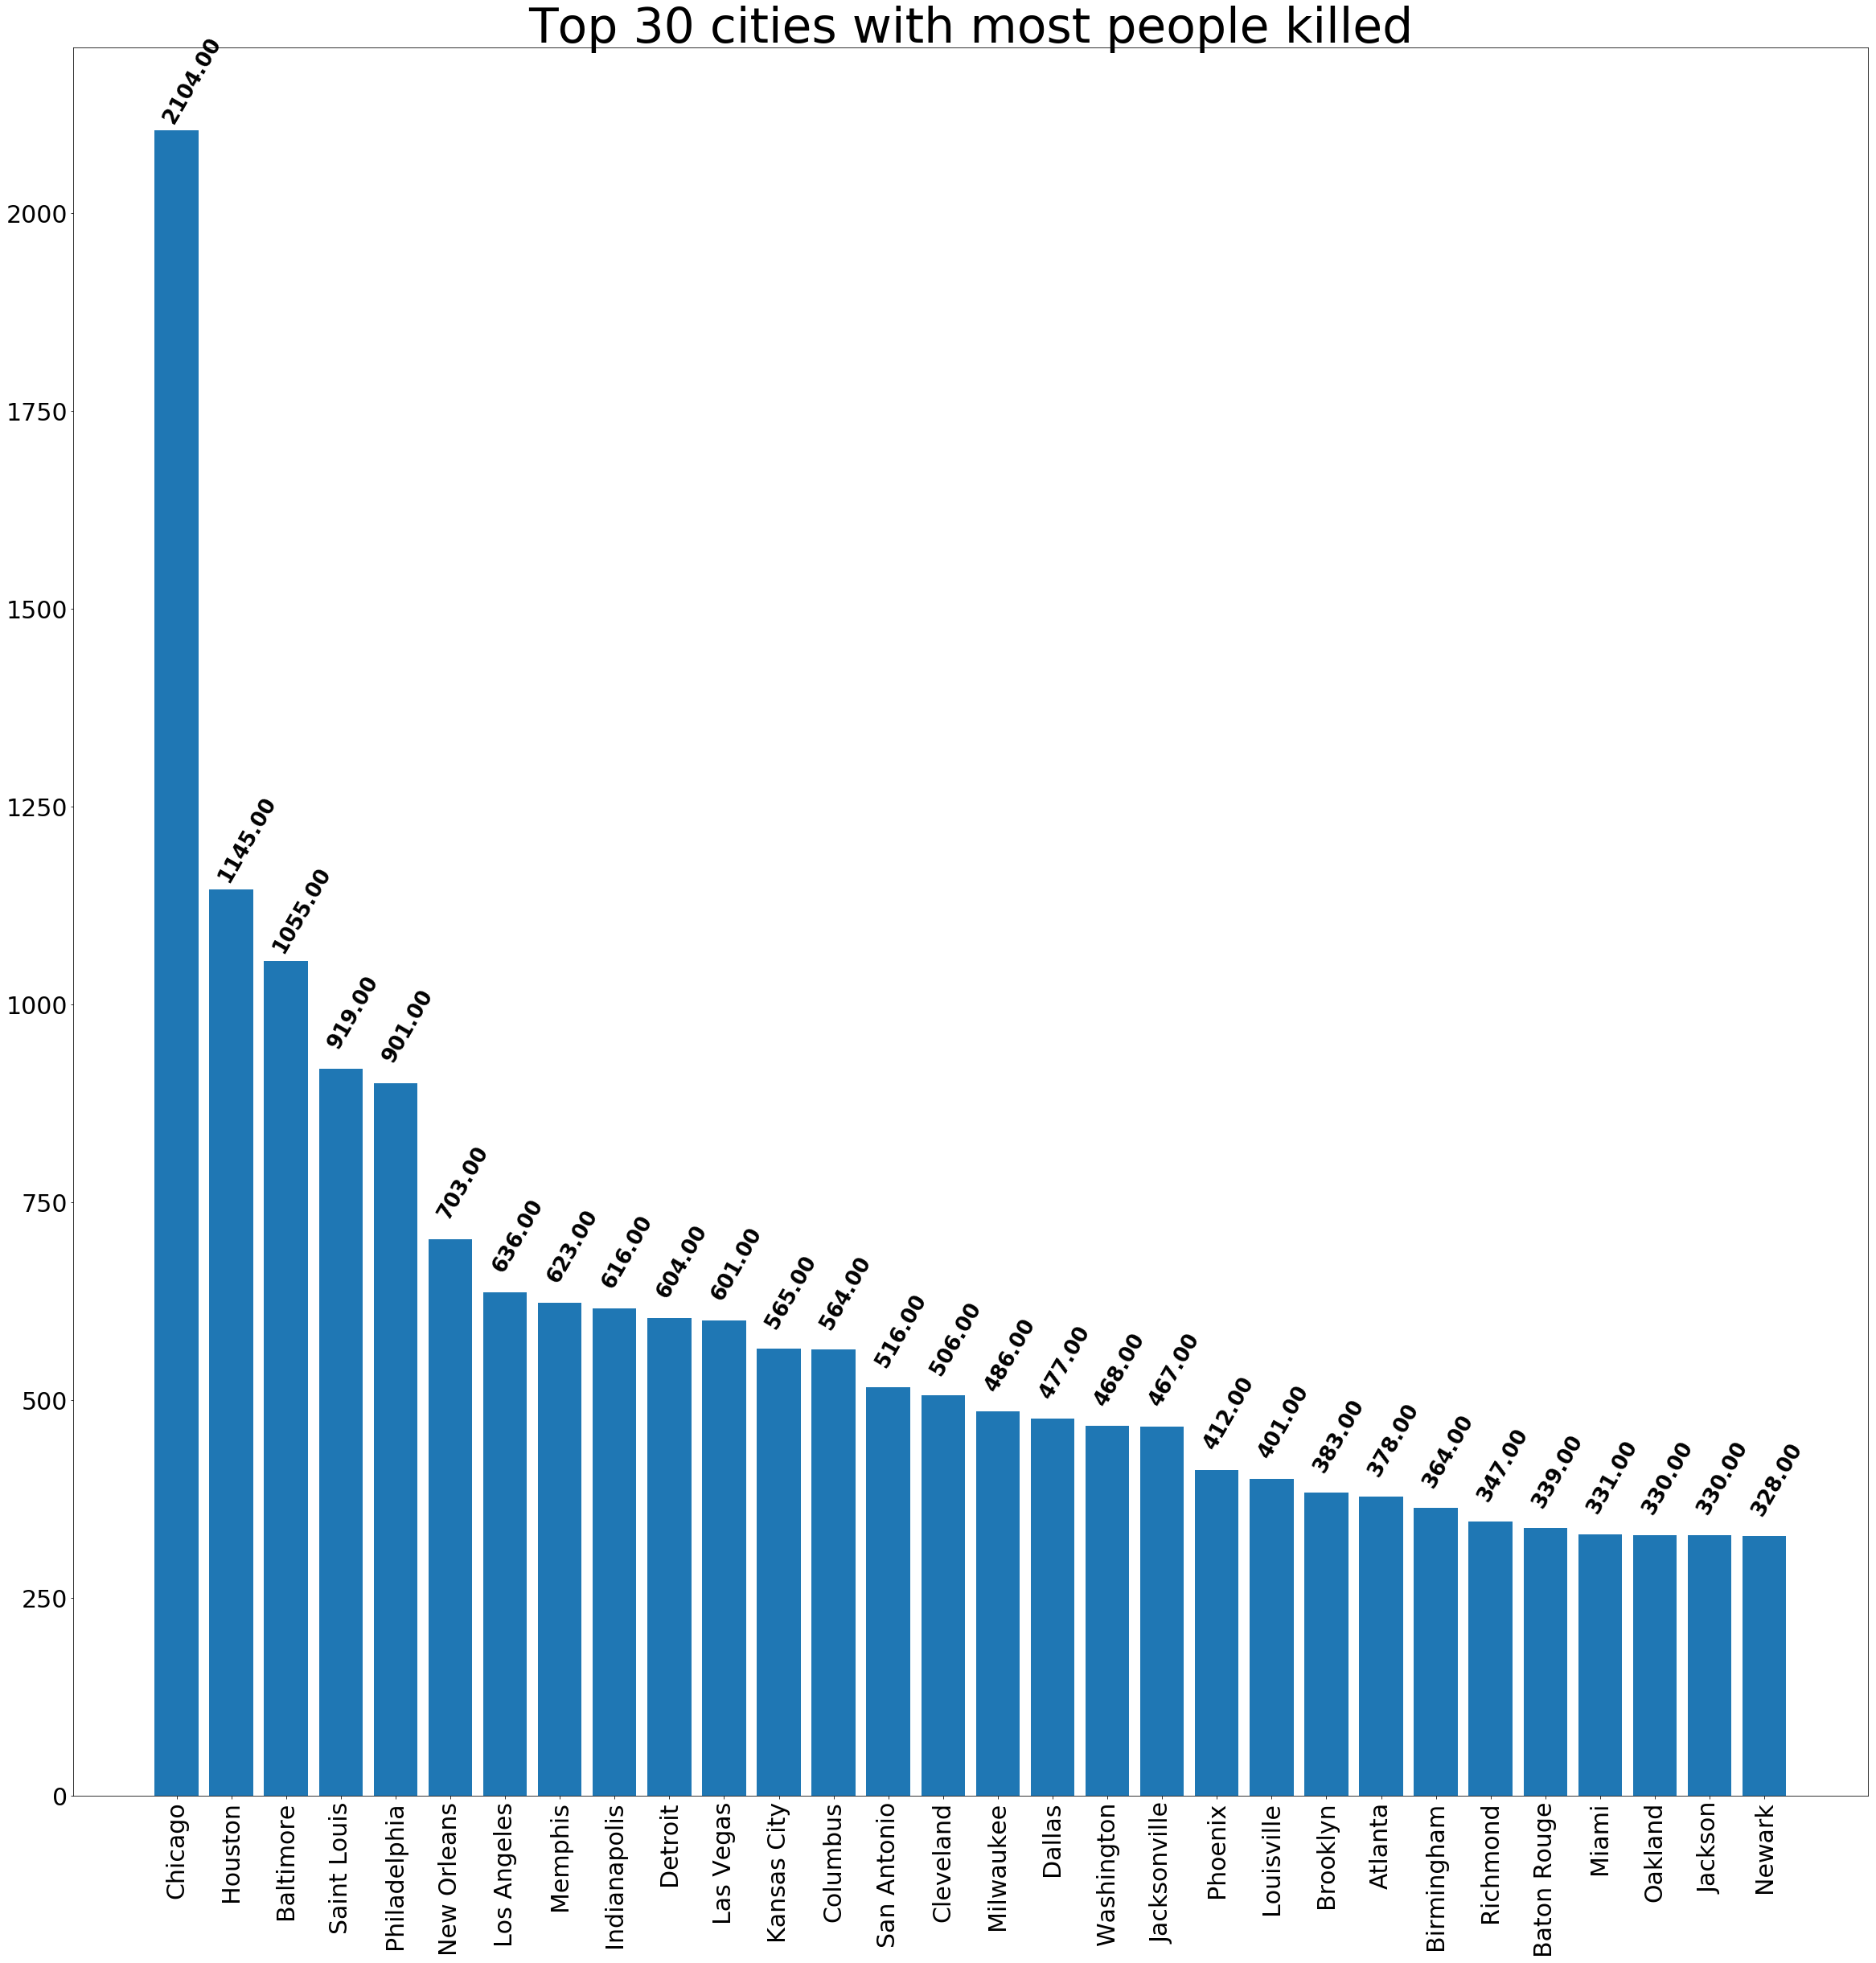

In [13]:
# dropna skips empty values
city_or_county = df[["city_or_county", "n_killed"]]

city_killed = []

for citycounty,n_killed in city_or_county.values:
    city_killed.append([citycounty,n_killed])

killed_per_city = {}

for tup in city_killed:
    if tup[0] in killed_per_city.keys():
        killed_per_city[tup[0]] += tup[1]
    else:
        killed_per_city[tup[0]] = tup[1]

# sort the dictionary by value size
killed_per_city = dict(reversed(sorted(killed_per_city.items(), key=operator.itemgetter(1))))

# take the top 30 biggest cities
killed_per_city_top30 = {k: killed_per_city[k] for k in list(killed_per_city)[:30]}

# plot figure

plt.figure(figsize=(40,40))
plt.bar(range(len(killed_per_city_top30)), list(killed_per_city_top30.values()), align='center')
plt.yticks(size=30)

for i, v in enumerate(killed_per_city_top30.values()):
    t = plt.text(i - 0.3, (v + 102), '{0:.2f}'.format(v), color='black', fontweight='bold', fontsize=26, rotation=60)

plt.xticks(range(len(killed_per_city_top30)), list(killed_per_city_top30.keys()), rotation='vertical',size=30)
plt.title('Top 30 cities with most people killed', fontsize=60)
plt.show()

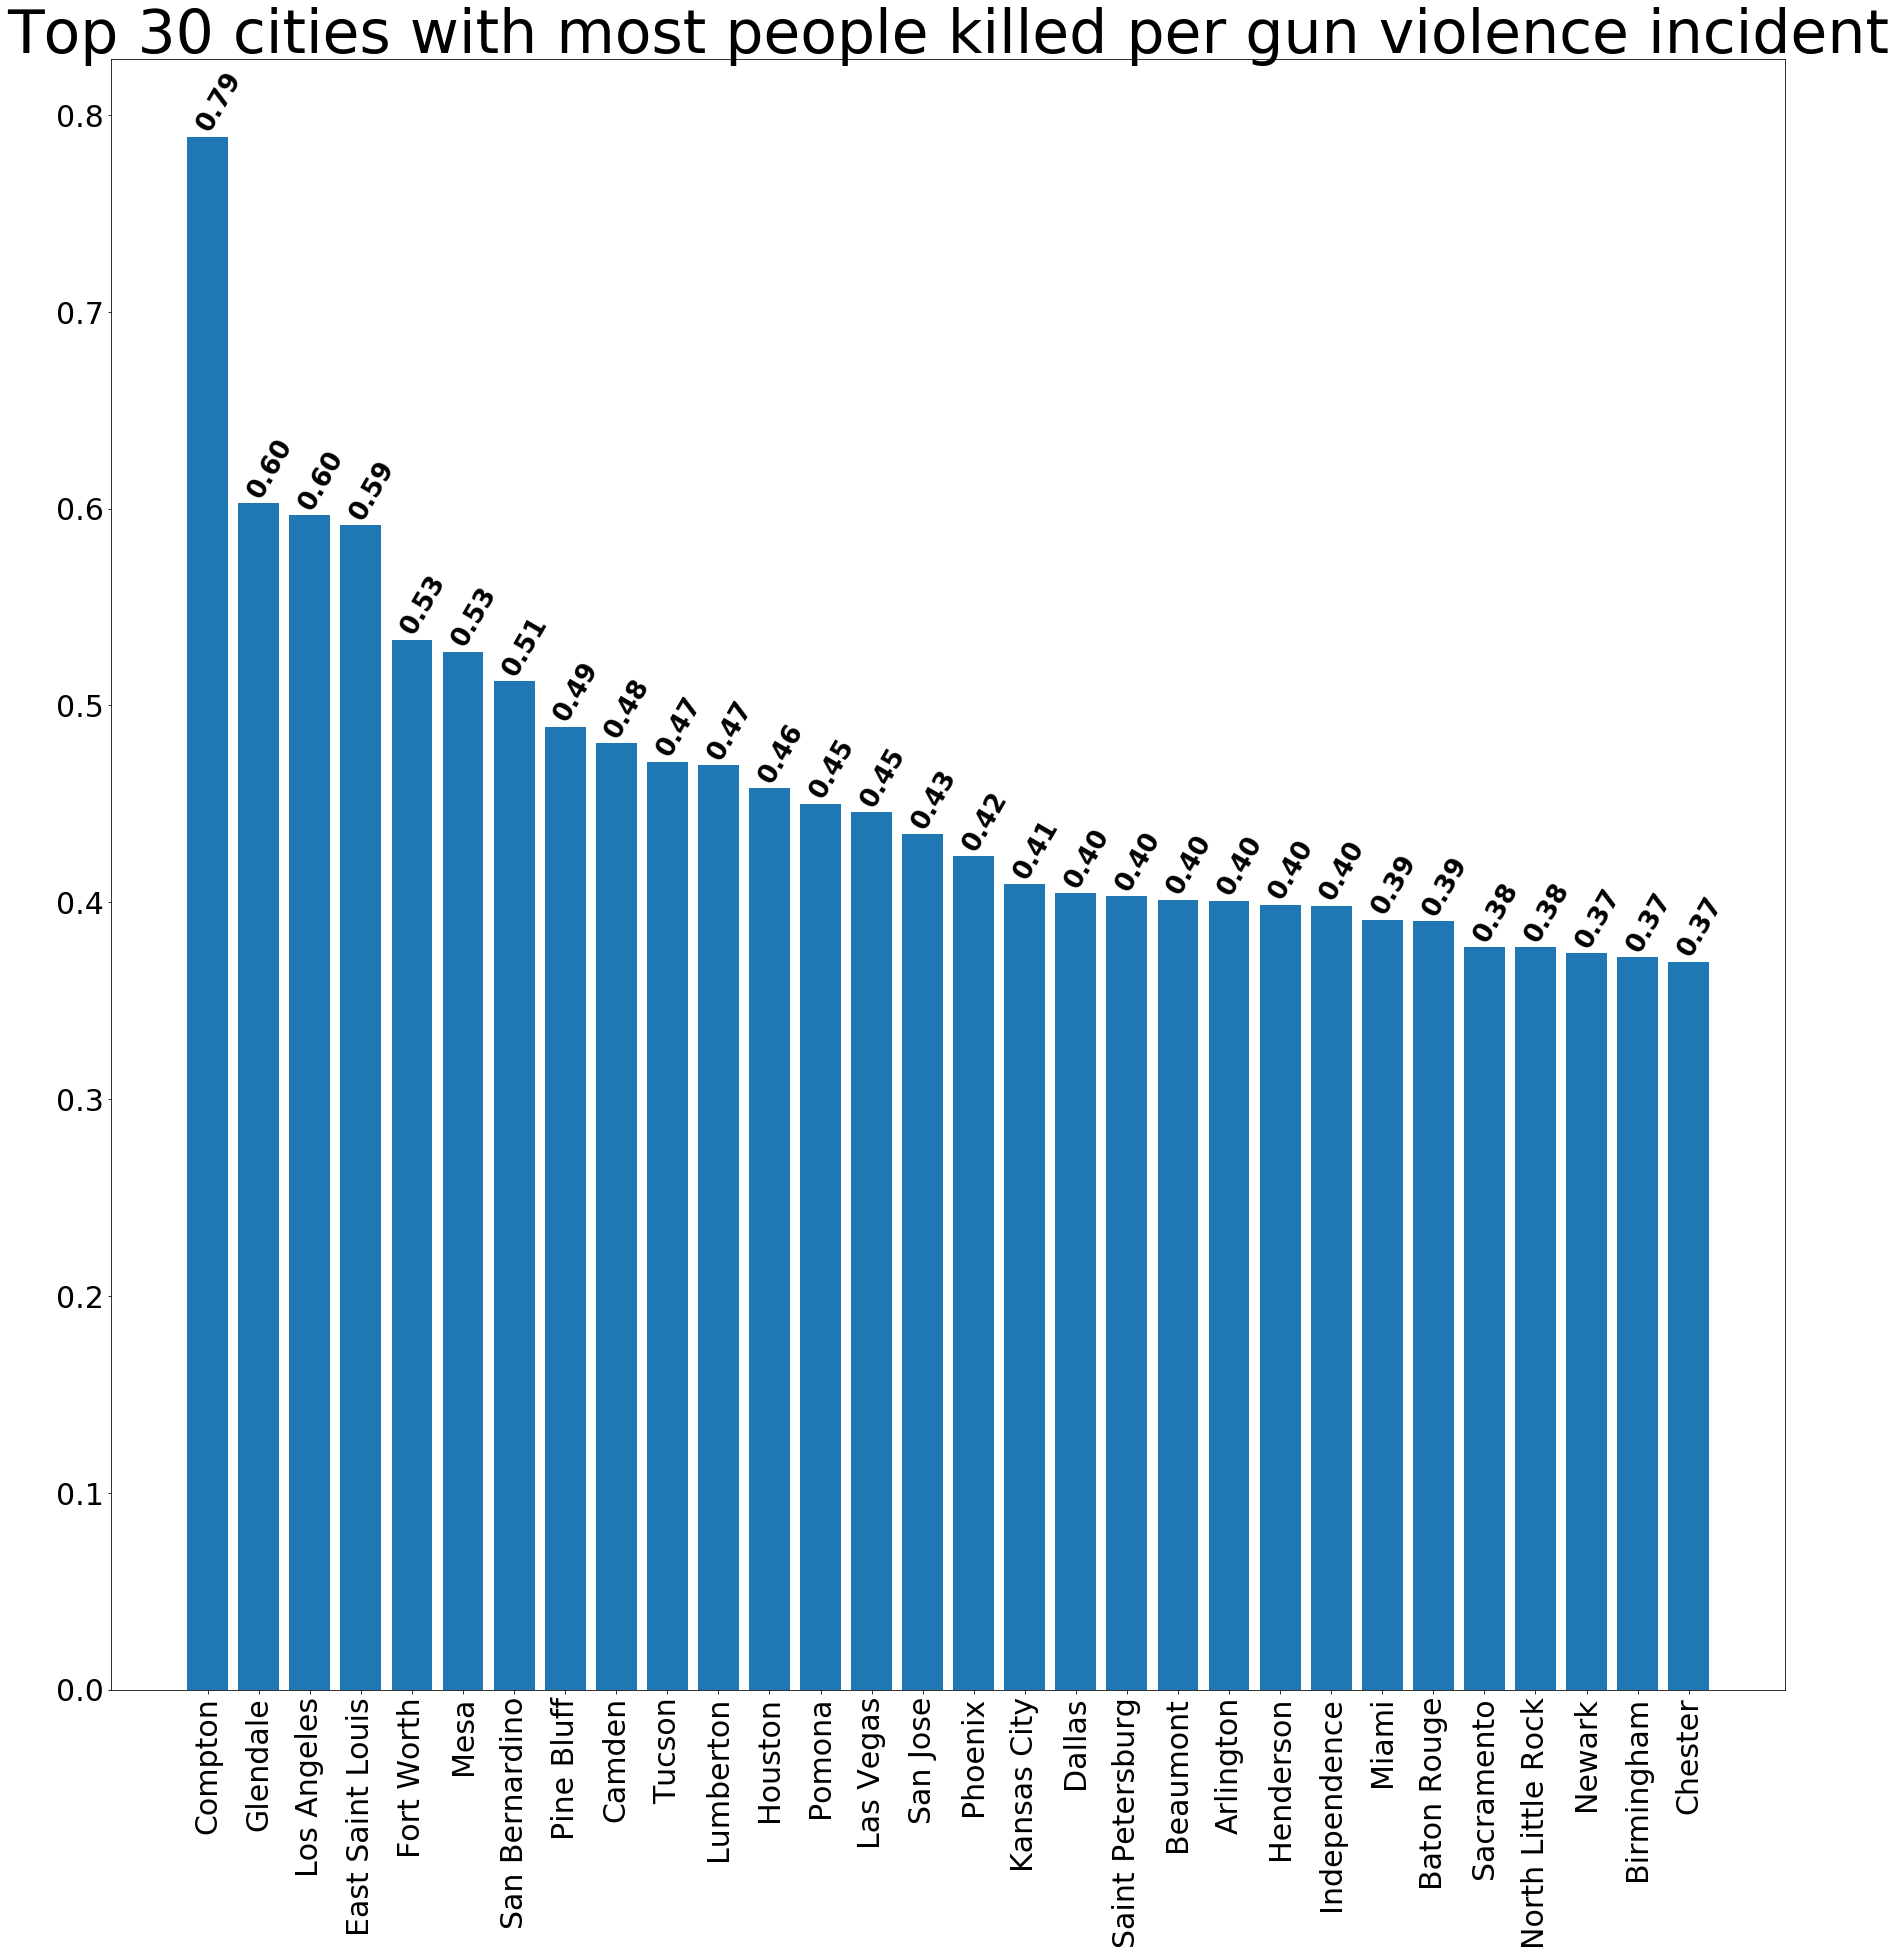

In [14]:
# dropna skips empty values
city_or_county = df["city_or_county"].dropna()


city_or_county_list = [] 


for citycounty in city_or_county:
    city_or_county_list.append(citycounty)

# count occurences in dictionary
city_crimes = dict((x,city_or_county_list.count(x)) for x in set(city_or_county_list))


# dropna skips empty values
city_or_county = df[["city_or_county", "n_killed"]]

city_killed = []

for citycounty,n_killed in city_or_county.values:
    city_killed.append([citycounty,n_killed])

killed_per_city = {}

for tup in city_killed:
    if tup[0] in killed_per_city.keys():
        killed_per_city[tup[0]] += tup[1]
    else:
        killed_per_city[tup[0]] = tup[1]
        
        
## people killed per shooting ##
killed_per_shooting = {}

for key in killed_per_city:
    peoplekilled = killed_per_city[key]
    occurences = city_crimes[key]
    # Safety measure
    if occurences >= 100:
        killed_per_shooting[key] = peoplekilled/occurences


# sort the dictionary by value size
killed_per_shooting = dict(reversed(sorted(killed_per_shooting.items(), key=operator.itemgetter(1))))

# take the top 30 biggest cities
killed_per_shooting_top30 = {k: killed_per_shooting[k] for k in list(killed_per_shooting)[:30]}

    
# plot figure
plt.figure(figsize=(30,30))
plt.bar(range(len(killed_per_shooting_top30)), list(killed_per_shooting_top30.values()), align='center')
plt.yticks(size=30)

for i, v in enumerate(killed_per_shooting_top30.values()):
    t = plt.text(i - 0.3, v + 0.025, '{0:.2f}'.format(v), color='black', fontweight='bold', fontsize=26, rotation=60)

plt.title('Top 30 cities with most people killed per gun violence incident', fontsize=60)    
plt.xticks(range(len(killed_per_shooting_top30)), list(killed_per_shooting_top30.keys()), rotation='vertical',size=30)
plt.show()




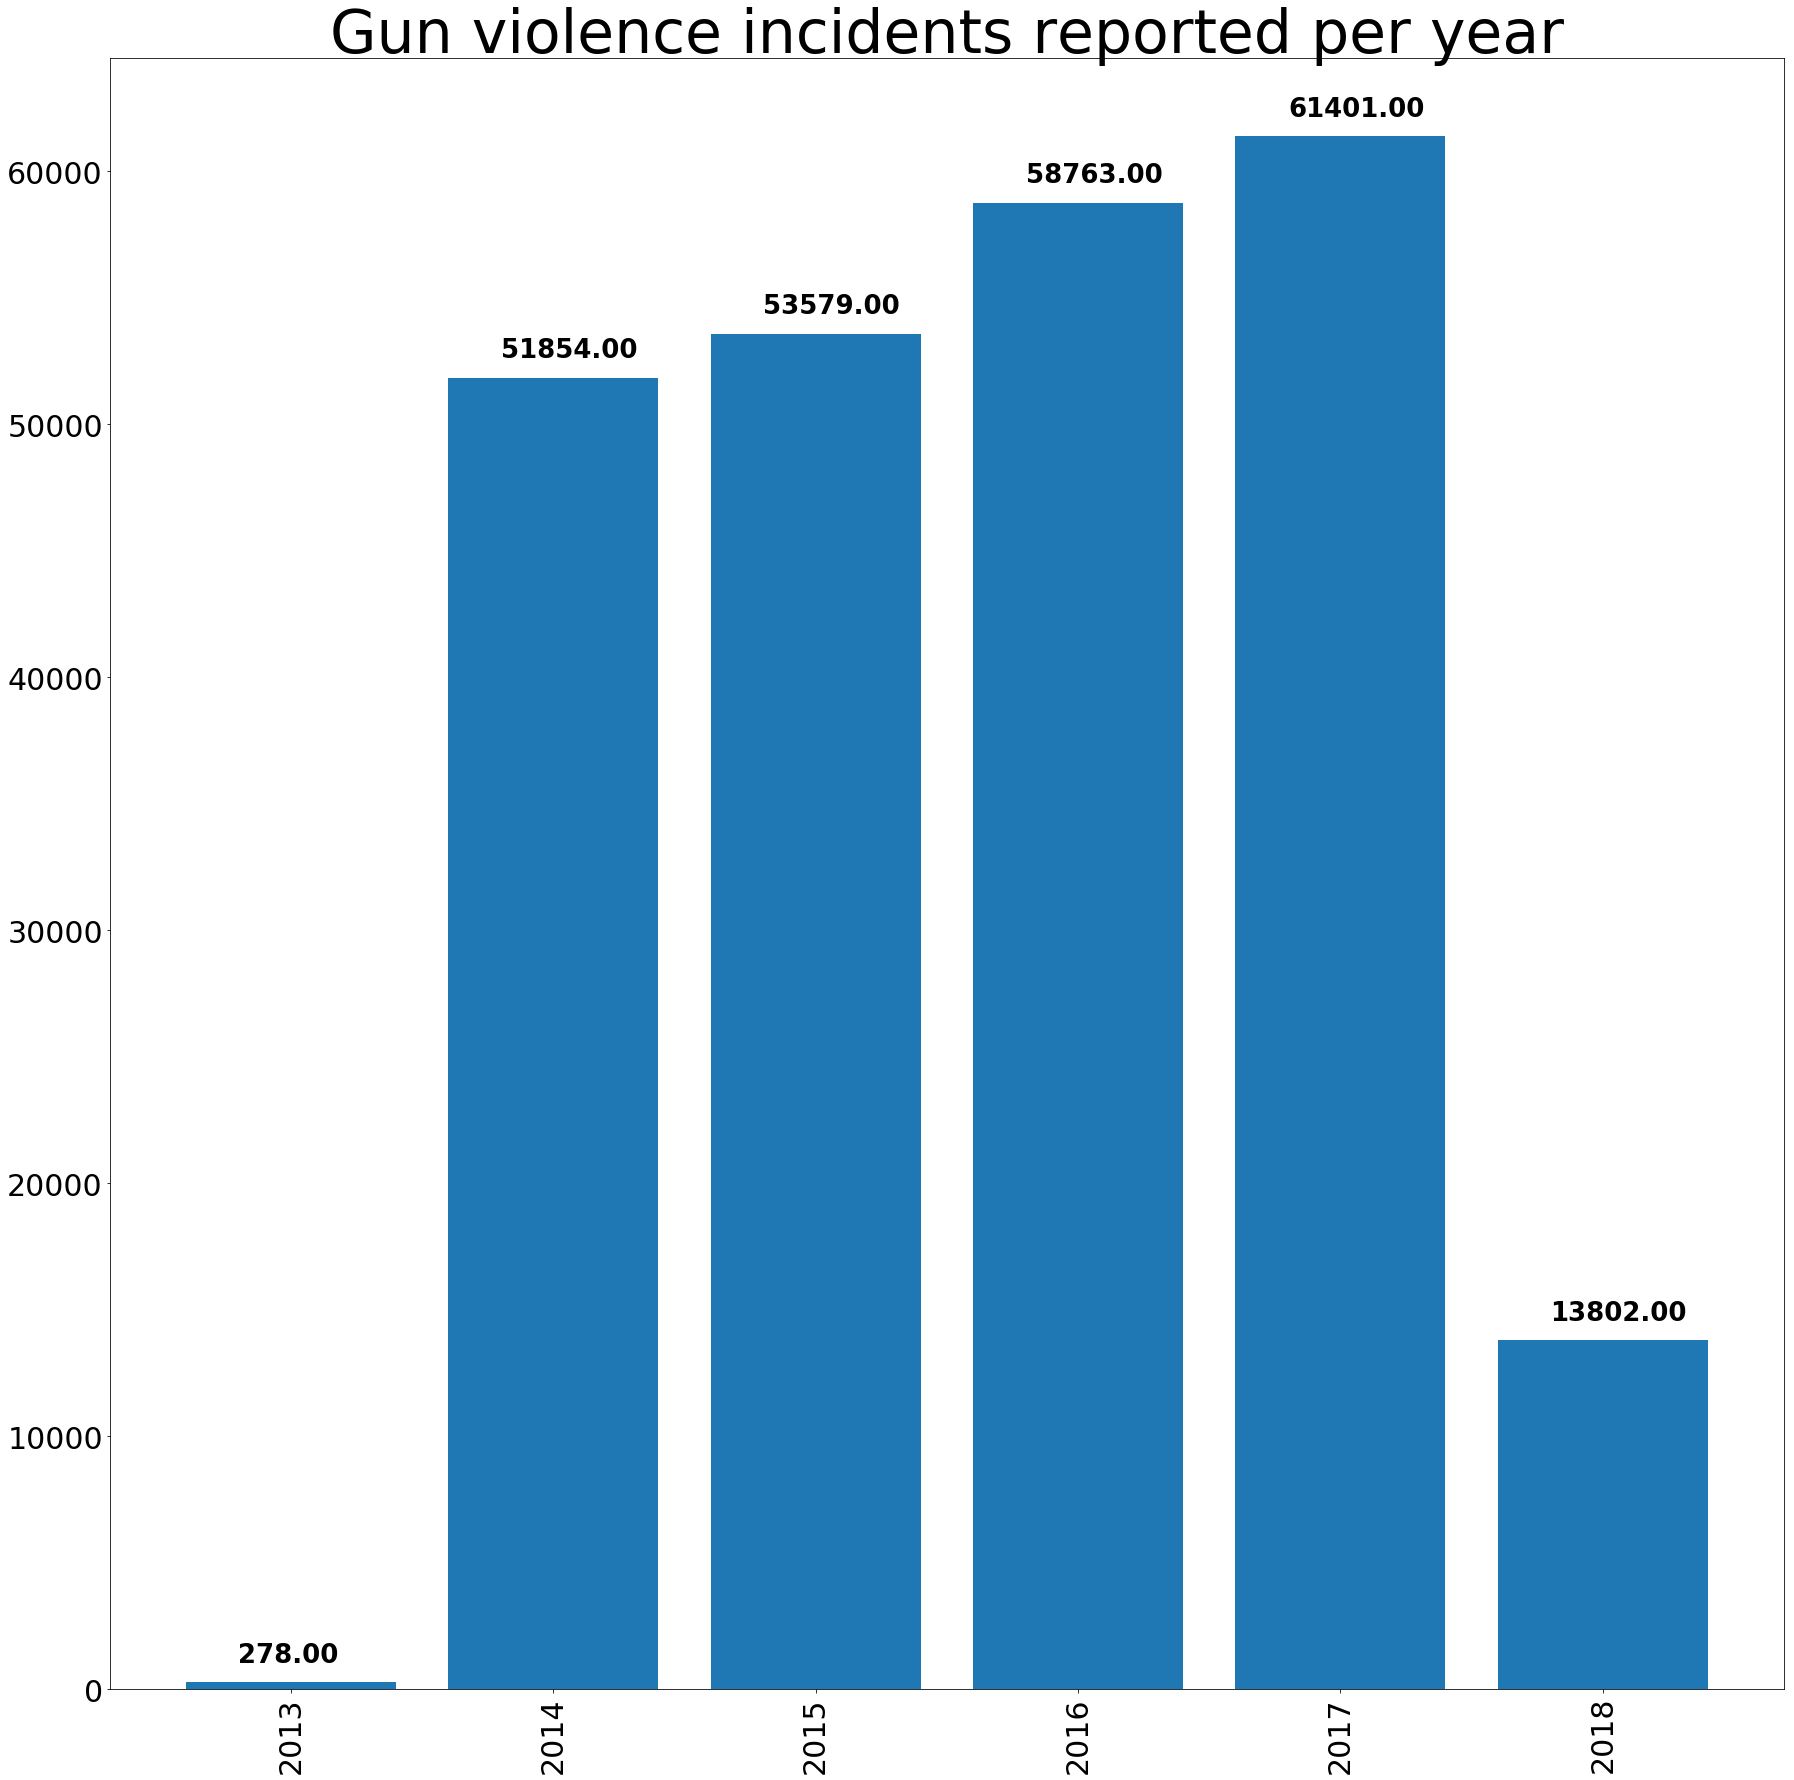

In [15]:
Dates = df["date"].values

occurences = {}
for date in Dates:
    year = date[:4]
    if year in occurences: 
        occurences[year] += 1
    else:
        occurences[year] = 1

    
# plot figure
plt.figure(figsize=(30,30))
plt.bar(range(len(occurences)), list(occurences.values()), align='center')
plt.yticks(size=30)

for i, v in enumerate(occurences.values()):
    t = plt.text(i - 0.2, v + 800, '{0:.2f}'.format(v), color='black', fontweight='bold', fontsize=26)

plt.title('Gun violence incidents reported per year', fontsize=60)    
plt.xticks(range(len(occurences)), list(occurences.keys()), rotation='vertical',size=30)
plt.show()


## Are there any notable differences between states/cities/years? Visualize the differences (or similarities) that you can find.

## Years

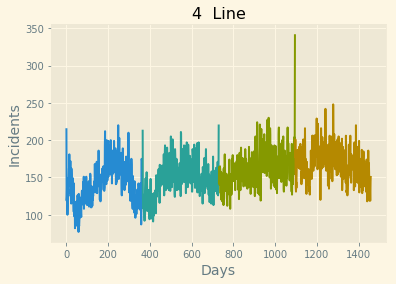

1095
1278
1241
969
1199
962
914
1205
730
927
249
1387
1018
1060
1240


In [43]:
#2014,2015,2016,2017

Dates = df["date"]

date_violence = {}
previousdate = ''
i = 0
for date in Dates:
    # skip 2013 and 2018 cause incomplete data
    if (date[:4] != '2013') and (date[:4] != '2018'): 
        if date != previousdate:
            i += 1

        if i in date_violence: 
            date_violence[i] += 1
        else:
            date_violence[i] = 1
            
        previousdate = date
 

y_2014 = {k: date_violence[k] for k in list(date_violence)[0:365]}
y_2015 = {k: date_violence[k] for k in list(date_violence)[365:730]}
y_2016 = {k: date_violence[k] for k in list(date_violence)[730:1095]}
y_2017 = {k: date_violence[k] for k in list(date_violence)[1095:1458]}



x_2014 = list(y_2014.keys())           
y_2014 = list(y_2014.values())  

x_2015 = list(y_2015.keys())           
y_2015 = list(y_2015.values())  

x_2016 = list(y_2016.keys())           
y_2016 = list(y_2016.values())  

x_2017 = list(y_2017.keys())           
y_2017 = list(y_2017.values())  


with plt.style.context('Solarize_Light2'):
    plt.plot(x_2014, y_2014)
    plt.plot(x_2015, y_2015)
    plt.plot(x_2016, y_2016)
    plt.plot(x_2017, y_2017)
    # Number of accent colors in the color scheme
    plt.title('4  Line')
    plt.xlabel('Days', fontsize=14)
    plt.ylabel('Incidents', fontsize=14)

plt.show()




In [54]:
Dates = df["date"]

date_violence_dates = {}

for date in Dates:
    # skip 2013 and 2018 cause incomplete data
    if (date[:4] != '2013') and (date[:4] != '2018'): 
        if date in date_violence_dates: 
            date_violence_dates[date] += 1
        else:
            date_violence_dates[date] = 1

print("TOP 15 DATES WITH MOST INCIDENTS")
print("________________________________")
print("")
for index, date in enumerate(nlargest(15, date_violence_dates, key=date_violence_dates.get)):
    print("{}. {}: {} incidents".format(index+1, date, date_violence_dates[date]))
    
print("New Year is definitely interesting")

TOP 15 DATES WITH MOST INCIDENTS
________________________________

1. 2017-01-01: 342 incidents
2. 2017-07-04: 248 incidents
3. 2017-05-28: 242 incidents
4. 2016-08-28: 230 incidents
5. 2017-04-16: 229 incidents
6. 2016-08-21: 227 incidents
7. 2016-07-04: 224 incidents
8. 2017-04-22: 222 incidents
9. 2016-01-01: 221 incidents
10. 2016-07-17: 221 incidents
11. 2014-09-06: 220 incidents
12. 2017-10-21: 220 incidents
13. 2016-10-16: 217 incidents
14. 2016-11-27: 217 incidents
15. 2017-05-27: 217 incidents
New Year is definitely interesting


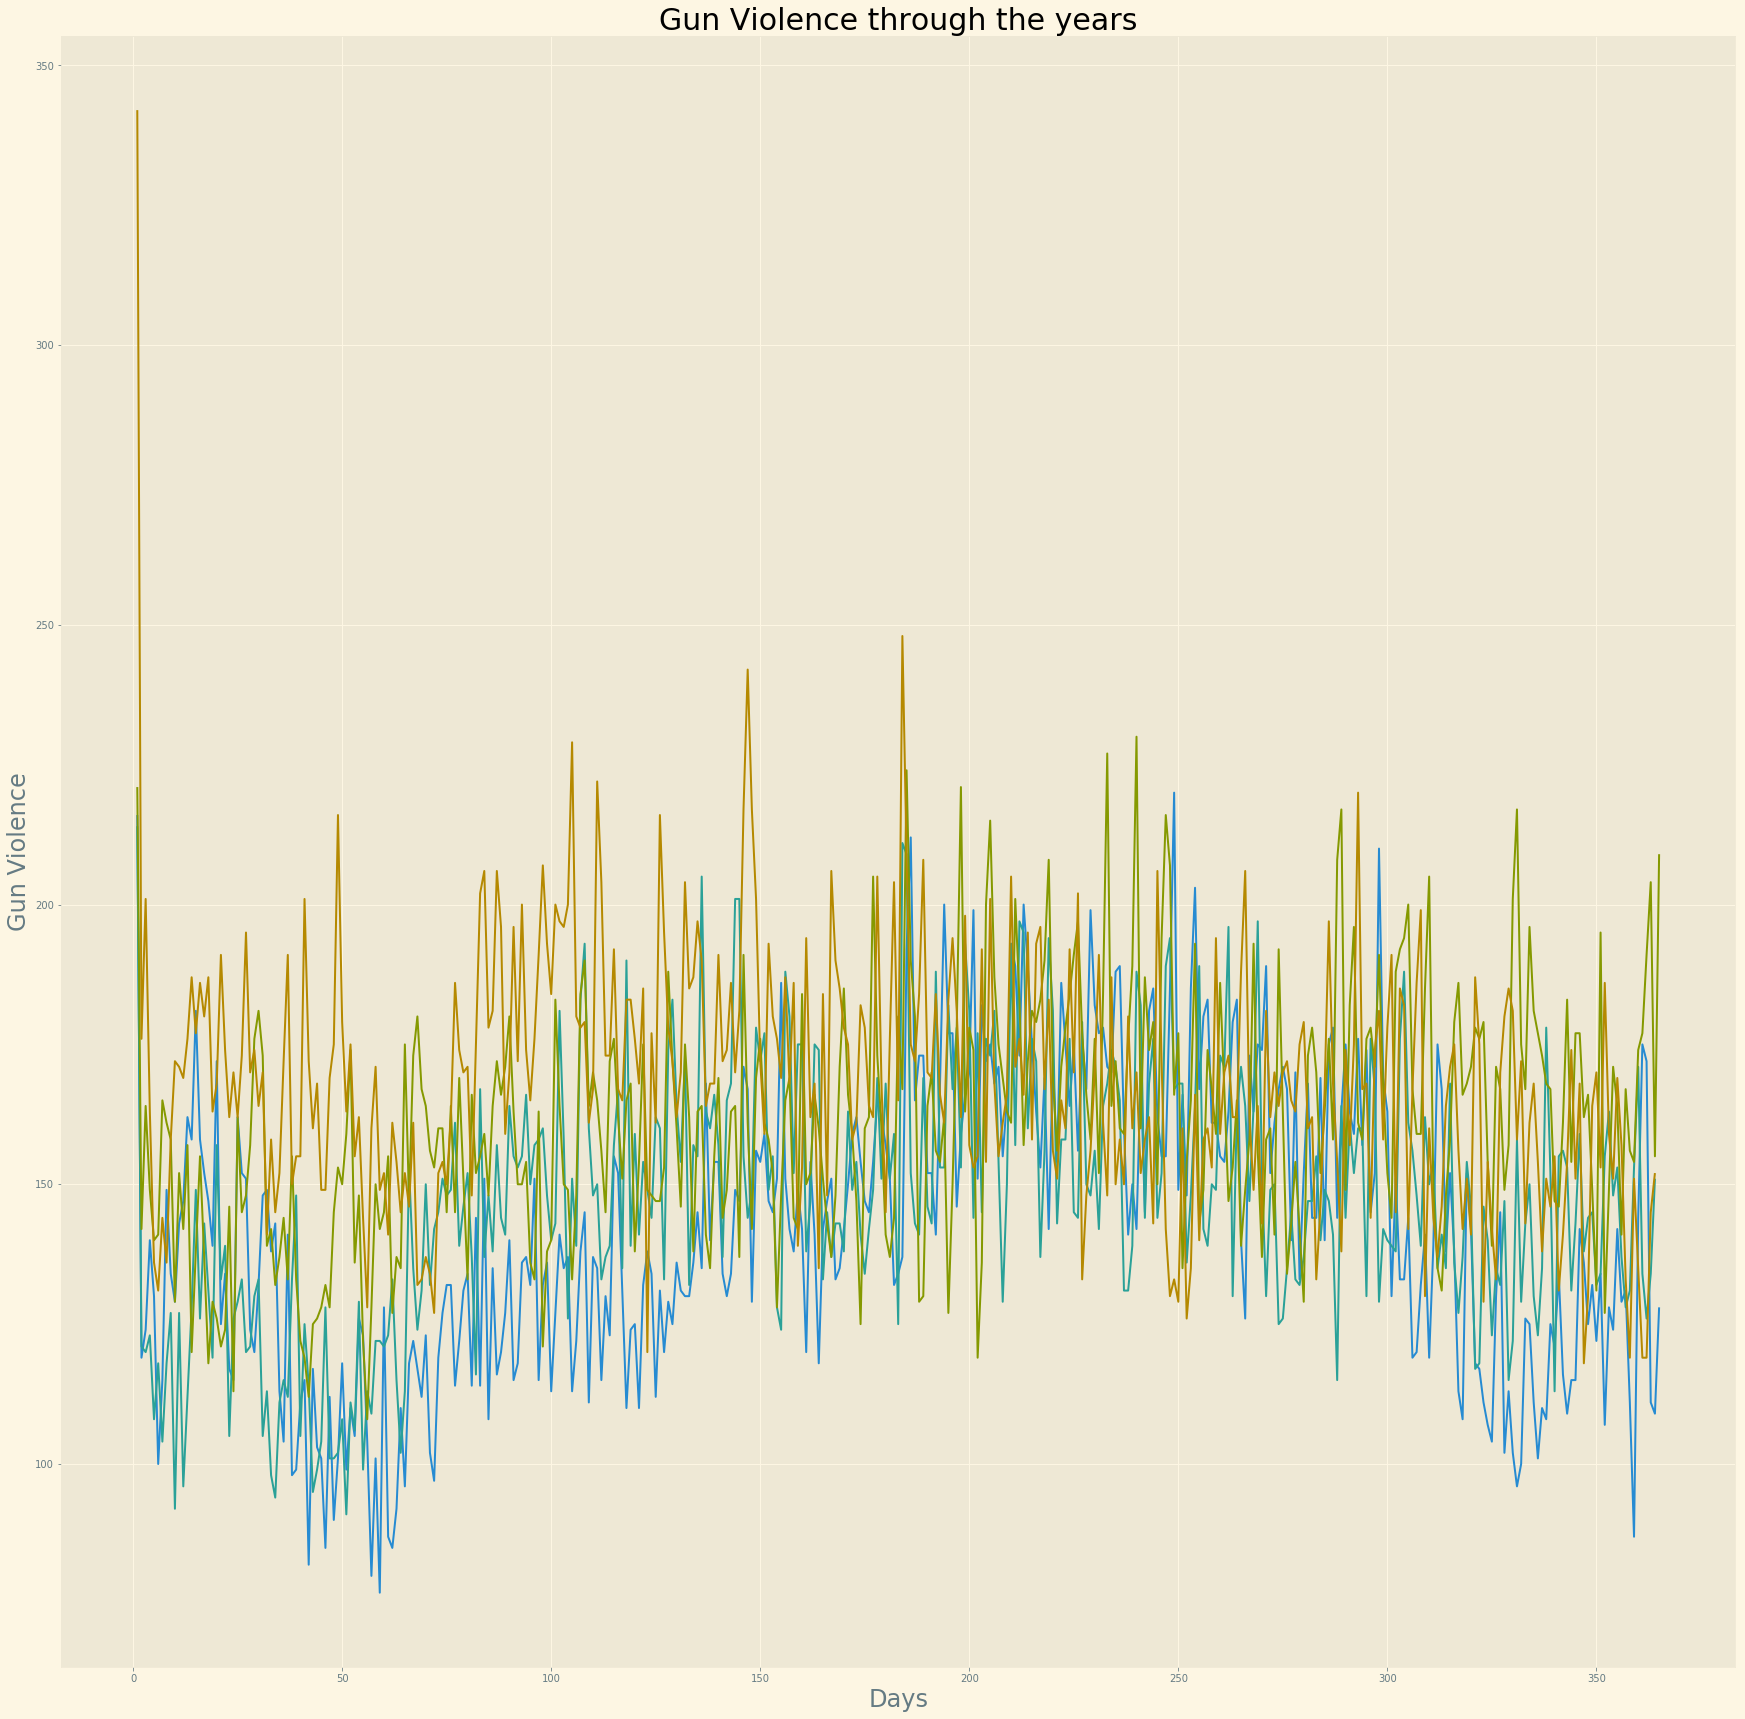

In [17]:
Dates = df["date"]

list_of_dicts = [{},{},{},{},{}]
d = 0
i = 0
previousyear = '2014'

for date in Dates:
    year_atm = date[:4]
    if (year_atm != '2013') and (year_atm != '2018'):
        if year_atm != previousyear:
            d += 1
            i = 0
            
        if date != previousdate:
            i += 1

        if i in list_of_dicts[d]: 
            list_of_dicts[d][i] += 1
        else:
            list_of_dicts[d][i] = 1

    previousyear = year_atm
    previousdate = date
    
list_of_dicts.pop(0)
    
    
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(30,30))
    for dictionary in list_of_dicts:
        plt.plot(dictionary.keys(), dictionary.values())
    plt.title('Gun Violence through the years', fontsize=30)
    plt.xlabel('Days', fontsize=24)
    plt.ylabel('Gun Violence', fontsize=24)

plt.show()


In [18]:
list_of_lists = [[],[],[],[],[],[],[],[]]
# 5 dicts, 1st is emty
i = 0

for dictionary in range(4):
    list_of_lists[i] = list(list_of_dicts[dictionary].keys())
    i += 1
    list_of_lists[i] = list(list_of_dicts[dictionary].values())
    i += 1

print(list_of_dicts)

[{1: 216, 2: 119, 3: 124, 4: 140, 5: 130, 6: 100, 7: 115, 8: 149, 9: 134, 10: 129, 11: 143, 12: 147, 13: 162, 14: 158, 15: 181, 16: 158, 17: 152, 18: 147, 19: 139, 20: 172, 21: 125, 22: 134, 23: 117, 24: 115, 25: 162, 26: 152, 27: 151, 28: 124, 29: 120, 30: 132, 31: 148, 32: 149, 33: 138, 34: 143, 35: 113, 36: 104, 37: 141, 38: 98, 39: 99, 40: 111, 41: 115, 42: 82, 43: 117, 44: 103, 45: 101, 46: 85, 47: 112, 48: 90, 49: 101, 50: 118, 51: 99, 52: 110, 53: 105, 54: 126, 55: 123, 56: 104, 57: 80, 58: 101, 59: 77, 60: 128, 61: 87, 62: 85, 63: 92, 64: 110, 65: 96, 66: 118, 67: 122, 68: 117, 69: 112, 70: 123, 71: 102, 72: 97, 73: 119, 74: 127, 75: 132, 76: 132, 77: 114, 78: 122, 79: 131, 80: 134, 81: 114, 82: 144, 83: 114, 84: 151, 85: 108, 86: 135, 87: 116, 88: 120, 89: 127, 90: 140, 91: 115, 92: 118, 93: 136, 94: 137, 95: 132, 96: 151, 97: 115, 98: 132, 99: 136, 100: 113, 101: 127, 102: 141, 103: 135, 104: 137, 105: 113, 106: 122, 107: 138, 108: 145, 109: 111, 110: 137, 111: 135, 112: 115,

In [19]:
def slope_intercept(x_val, y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = ( ( (np.mean(x)*np.mean(y) ) - np.mean(x*y)) /
        ( ( np.mean(x)*np.mean(x)) - np.mean(x*x)))

    m = round(m,2)
    b=(np.mean(y)-np.mean(x)*m)
    b=round(b,2)
    return m,b

In [20]:
i = 0
reg = 0
regression = [[],[],[],[]]

for dictionary in range(4):
    xs = list_of_lists[i]
    i += 1
    ys = list_of_lists[i]
    m, b = slope_intercept(xs, ys)
    regression[reg] = reg_line=[(m*x)+b for x in xs]
    i += 1
    reg += 1

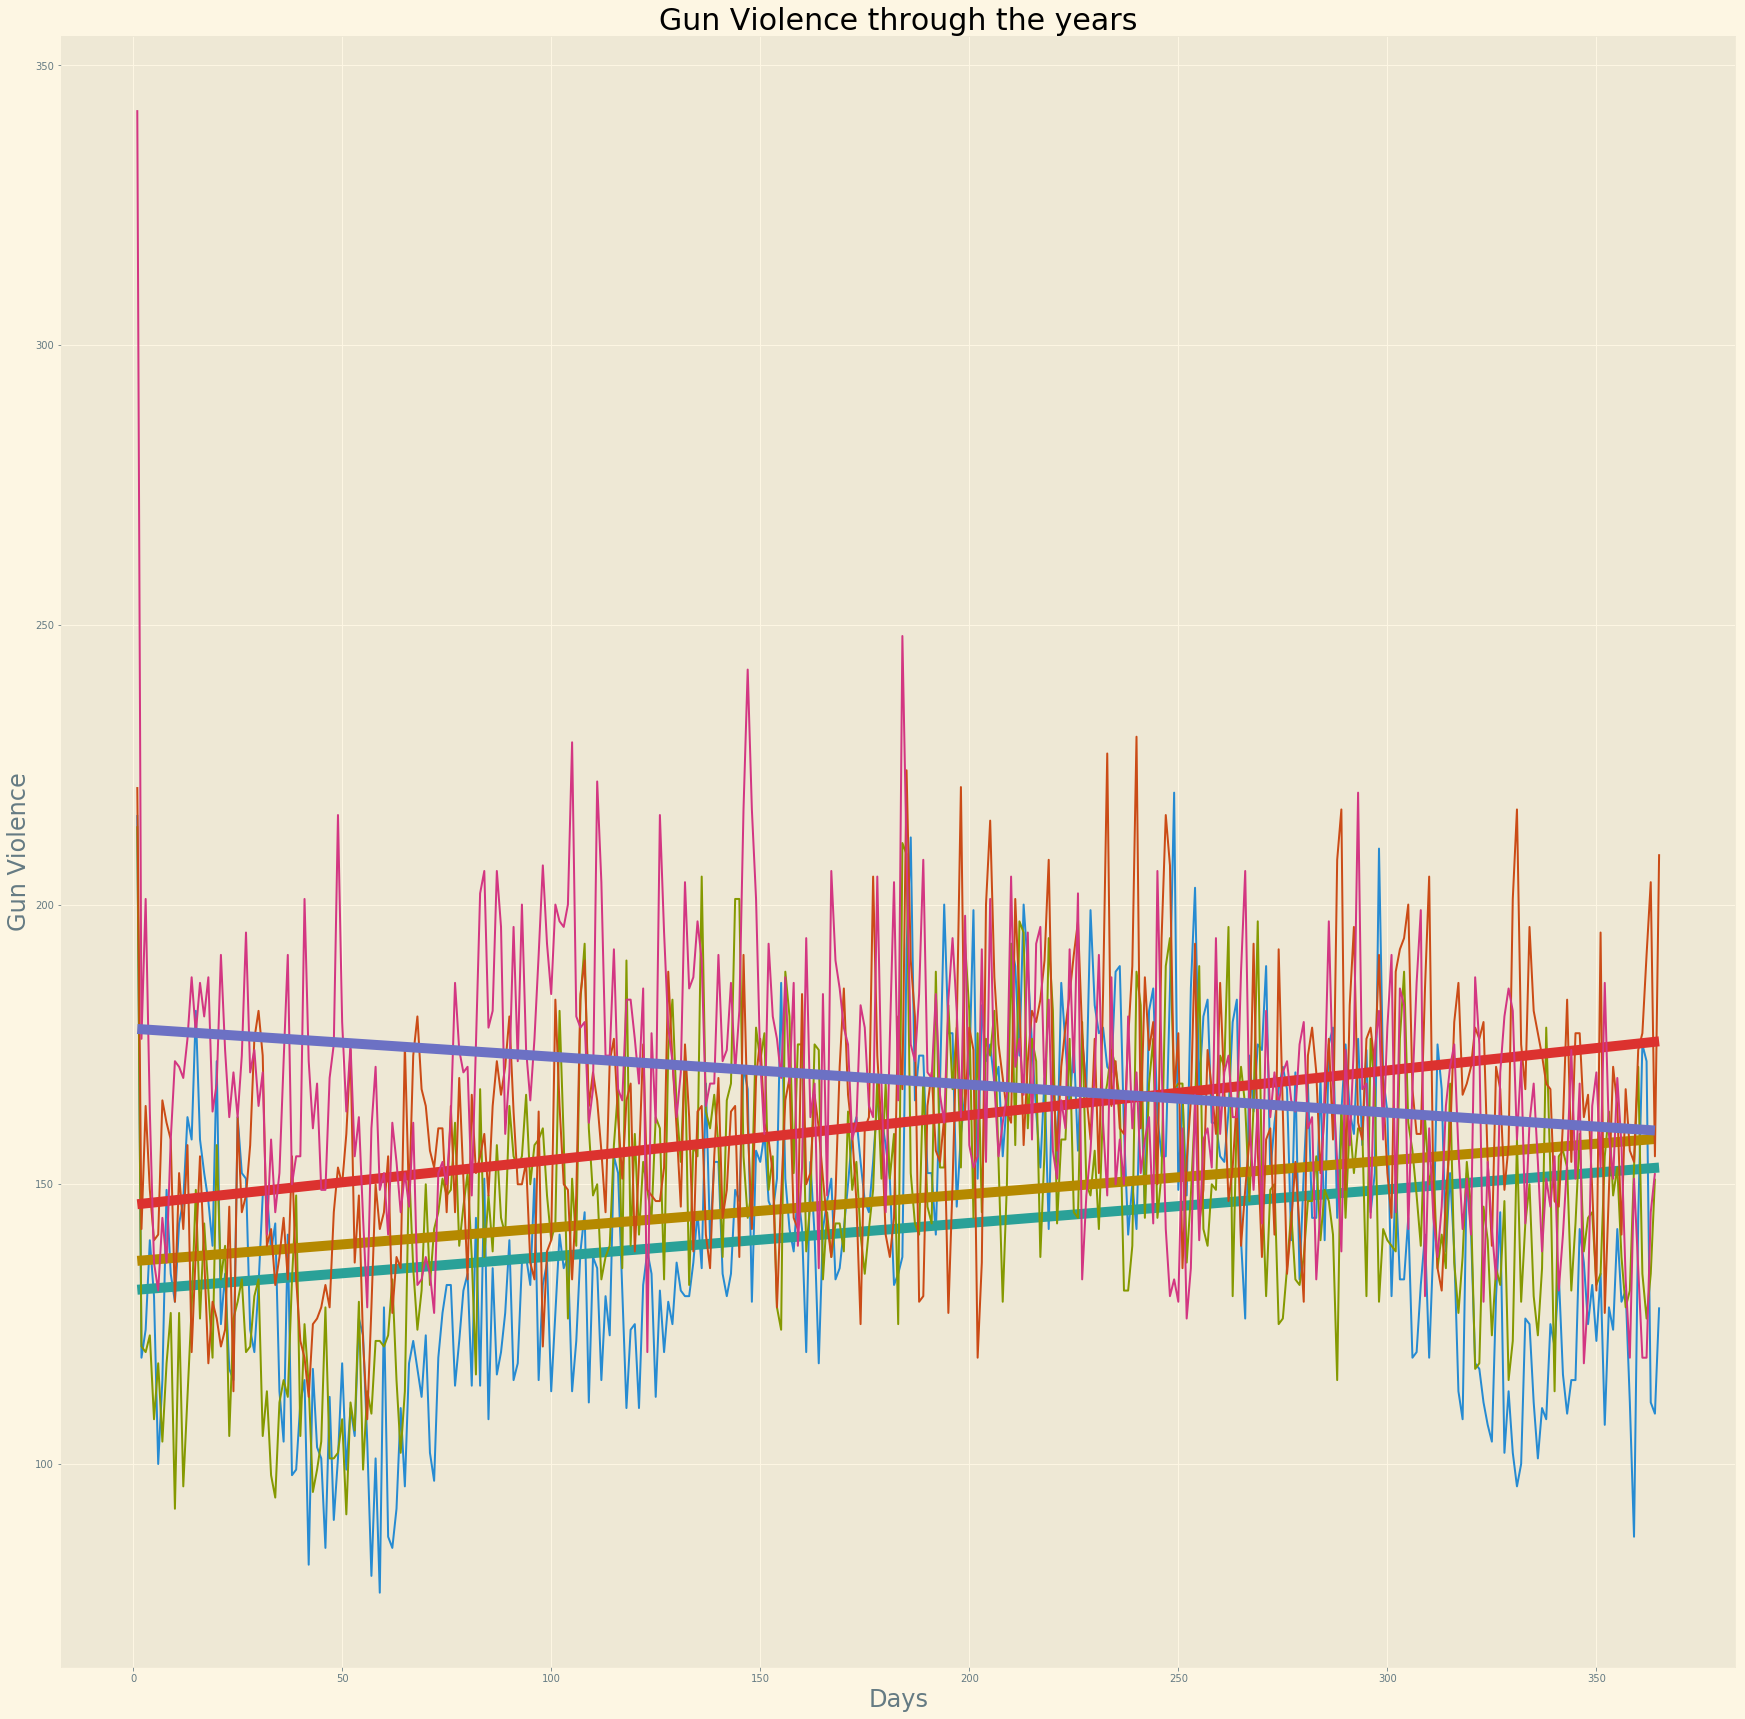

In [21]:
with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(30,30))
    i = 0
    for dictionary in list_of_dicts:
        plt.plot(dictionary.keys(), dictionary.values())
        plt.plot(dictionary.keys(), regression[i], linewidth=10)
        i += 1
    plt.title('Gun Violence through the years', fontsize=30)
    plt.xlabel('Days', fontsize=24)
    plt.ylabel('Gun Violence', fontsize=24)

plt.show()

In [ ]:
print("On the days: ")

## NU VRAAG: Is there a correlation between mentalhealth and gunviolence?

In [22]:
dfr = pd.read_csv('ranking.csv')

In [23]:
# Print first 1000 rows of df
dfr.head(1000)

,States,Mhr,AccessToMhcR
0,Massachusetts,1,2
1,South Dakota,2,8
2,Minnesota,3,3
3,Vermont,4,1
4,Connecticut,5,5
5,Iowa,6,9
6,North Dakota,7,15
7,Maine,8,4
8,Hawaii,9,23
9,New Jersey,10,25


In [24]:
df1 = pd.read_csv('clean_data_v2.csv', parse_dates=['date'])


In [25]:
GVperHead = {}


# dropna skips empty values
States = df1[["state", "date"]].dropna()

mask = (States.date.dt.year >= 2013) & (States.date.dt.year <= 2017)

States = States.loc[mask]


# 1 2013 until 12 2017
Population = pd.read_csv('population_per_state_v2.csv')

StateIndex = {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'Florida': 8, 'Georgia': 9, 'Hawaii': 10, 'Idaho': 11, 'Illinois': 12, 'Indiana': 13, 'Iowa': 14, 'Kansas': 15, 'Kentucky': 16, 'Louisiana': 17, 'Maine': 18, 'Maryland': 19, 'Massachusetts': 20, 'Michigan': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Montana': 25, 'Nebraska': 26, 'Nevada': 27, 'New Hampshire': 28, 'New Jersey': 29, 'New Mexico': 30, 'New York': 31, 'North Carolina': 32, 'North Dakota': 33, 'Ohio': 34, 'Oklahoma': 35, 'Oregon': 36, 'Pennsylvania': 37, 'Rhode Island': 38, 'South Carolina': 39, 'South Dakota': 40, 'Tennessee': 41, 'Texas': 42, 'Utah': 43, 'Vermont': 44, 'Virginia': 45, 'Washington': 46, 'West Virginia': 47, 'Wisconsin': 48, 'Wyoming': 49}

IncidentsPerHead = {} 

for indexStat, rowStat in States.iterrows():
    year = rowStat[1].year
    month = rowStat[1].month
    popMonth = str(month) + '/' + str(year)
    if rowStat[0] == 'District of Columbia':
        rowStat[0] = 'Maryland'
    if rowStat[0] in IncidentsPerHead.keys():
        IncidentsPerHead[rowStat[0]] += 1/(Population[popMonth][StateIndex[rowStat[0]]])
    else:
        IncidentsPerHead[rowStat[0]] = 1/(Population[popMonth][StateIndex[rowStat[0]]])

print(IncidentsPerHead)


{'Pennsylvania': 0.00065910833805774135, 'California': 0.0003893061079398854, 'Ohio': 0.00083052254091242562, 'Colorado': 0.0005422140678445831, 'North Carolina': 0.00081939608425898522, 'Oklahoma': 0.00083391787286750765, 'New Mexico': 0.0007494215326038832, 'Louisiana': 0.0016441981762885247, 'Maryland': 0.0014065660527977208, 'Tennessee': 0.0010942543639066431, 'Missouri': 0.0010296500523084597, 'Illinois': 0.0013022686223027606, 'Delaware': 0.0016693332830980984, 'Utah': 0.00033669525998296471, 'Michigan': 0.00054396809092387903, 'Georgia': 0.00083080777552307905, 'Indiana': 0.00083343181984913317, 'Mississippi': 0.0011147253621961309, 'New York': 0.0004736412879819128, 'Florida': 0.0006951723778008417, 'Washington': 0.00044738985823456552, 'South Carolina': 0.0013365257004383153, 'Arizona': 0.00031840046368585977, 'Kentucky': 0.00089012358400486578, 'New Jersey': 0.00057575279634627008, 'Virginia': 0.00067431092465791275, 'Wisconsin': 0.0007641814543697603, 'Rhode Island': 0.00079

In [26]:
# 1 2013 until 12 2017
dfp = pd.read_csv('population_per_state_v2.csv')

print(dfp.head())

        state    1/2013    2/2013    3/2013    4/2013    5/2013    6/2013  \
0     Alabama   4827660   4828441   4829222   4830003   4830784   4831566   
1      Alaska    736760    736810    736860    736910    736960    737010   
2     Arizona   6616124   6622602   6629087   6635578   6642075   6648579   
3    Arkansas   2956780   2957565   2958351   2959137   2959923   2960709   
4  California  38347383  38366908  38386443  38405988  38425543  38445108   

     7/2013    8/2013    9/2013    ...       3/2017    4/2017    5/2017  \
0   4832348   4833130   4833912    ...      4866866   4867653   4868441   
1    737060    737111    737162    ...       739304    739355    739406   
2   6655089   6661606   6668129    ...      6947935   6954738   6961548   
3   2961496   2962283   2963070    ...      2996310   2997106   2997902   
4  38464683  38484268  38503863    ...     39335916  39355944  39375983   

     6/2017    7/2017    8/2017    9/2017   10/2017   11/2017   12/2017  
0   4869229 

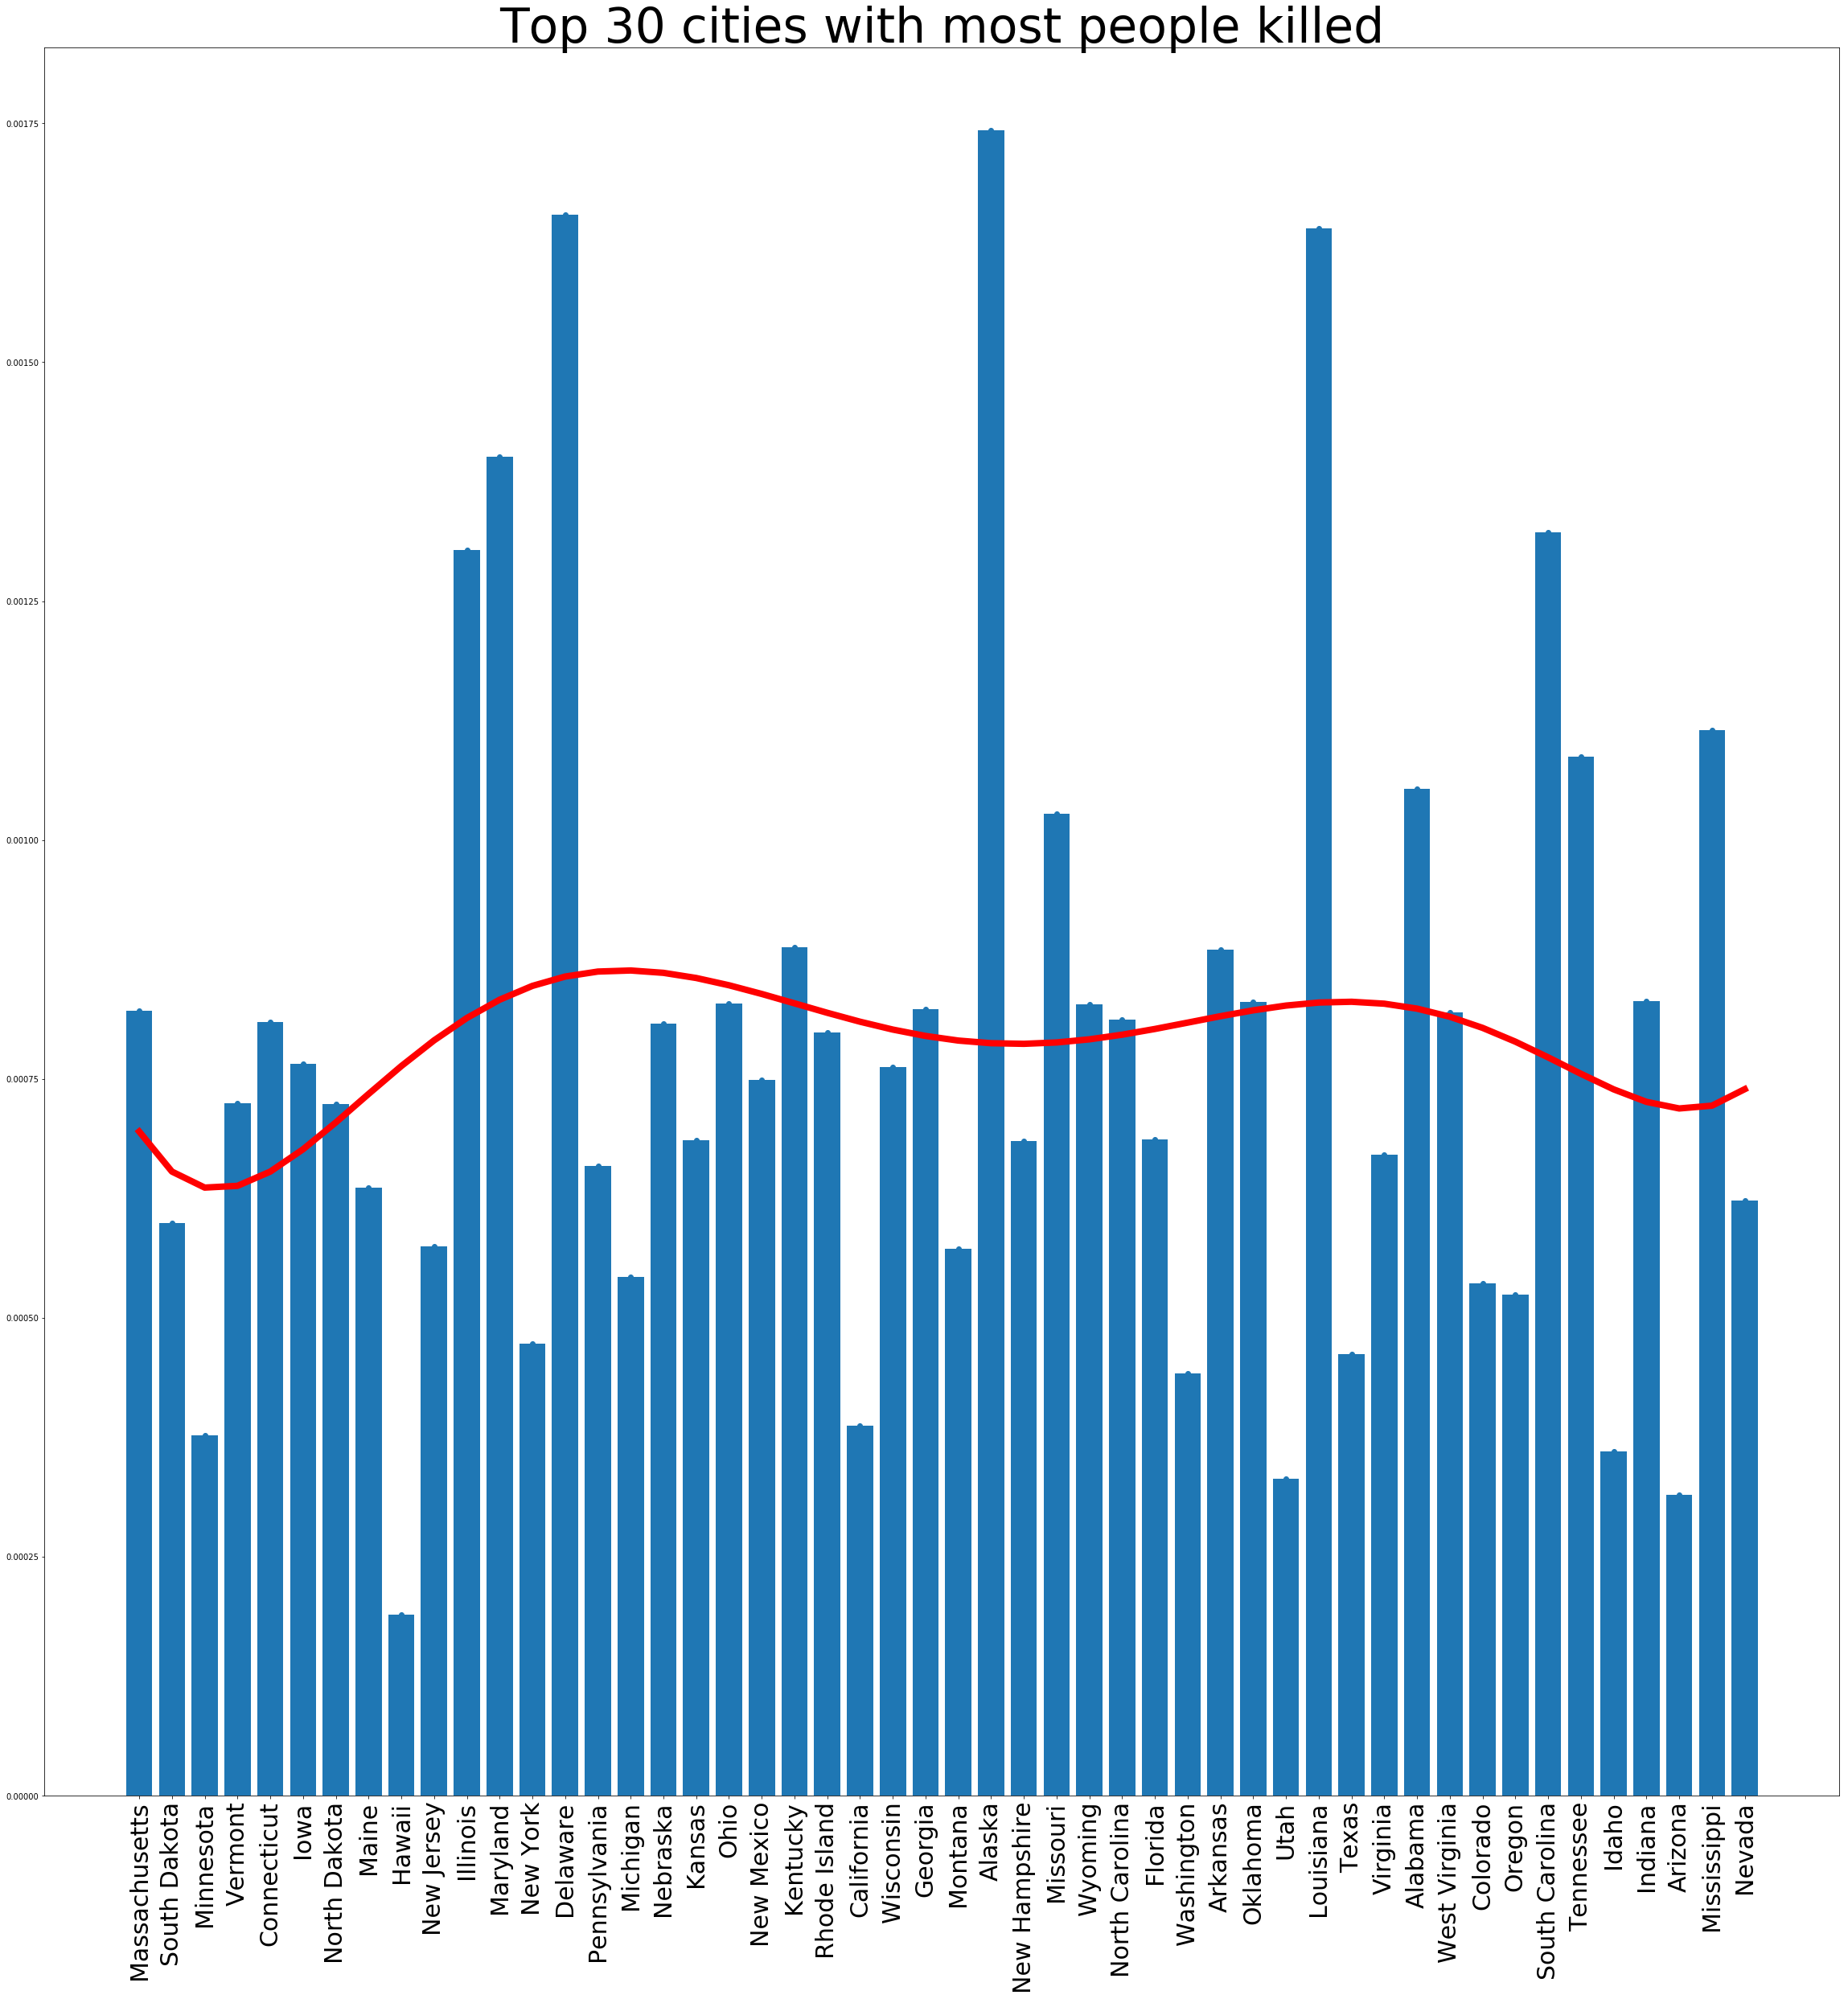

In [57]:
list_values_y = []
list_keys_x = []

for state in dfr['States']:
    list_keys_x.append(state)
    list_values_y.append(IncidentsPerHead[state])

x = list(range(50))
y = list_values_y
p2 = np.polyfit(x,y,6.5)



plt.figure(figsize=(40,40))
plt.bar(range(len(list_keys_x)), list(list_values_y), align='center')
plt.plot(x,y,'o')
plt.plot(x,np.polyval(p2,x),'r-',linewidth=8)

plt.xticks(range(len(list_keys_x)), list(list_keys_x), rotation='vertical',size=30)
plt.title('Top 30 cities with most people killed', fontsize=60)
plt.show()


In [64]:

# als er in een staat 4 mensen wonen, 1 incident vindt plaats, dan is dat 1/4 ratio van incident/hoofd
# en volgende maand 3 mensen wonen, en er weer 1 incident plaats vindt , dan is dat 1/3 ratio van incident/hoofd
# om het gemiddelde te krijgen moet je die twee getallen bij elkaar optellen en dan dat nog delen door het gemiddelde.
# dus ((1/4)+(1/3))/2

#incidenten per staat


state_incident = df["state"].dropna()

state_incident_list = [] 

for state in state_incident:
    if state == "District of Columbia":
        state = "Maryland"
    state_incident_list.append(state)

# count occurences in dictionary
incidents_per_state = dict((x,state_incident_list.count(x)) for x in set(state_incident_list))

#___________


GVperHead = {}


# dropna skips empty values
States = df1[["state", "date"]].dropna()

mask = (States.date.dt.year >= 2013) & (States.date.dt.year <= 2017)

States = States.loc[mask]


# 1 2013 until 12 2017
Population = pd.read_csv('population_per_state_v2.csv')

StateIndex = {'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'Florida': 8, 'Georgia': 9, 'Hawaii': 10, 'Idaho': 11, 'Illinois': 12, 'Indiana': 13, 'Iowa': 14, 'Kansas': 15, 'Kentucky': 16, 'Louisiana': 17, 'Maine': 18, 'Maryland': 19, 'Massachusetts': 20, 'Michigan': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Montana': 25, 'Nebraska': 26, 'Nevada': 27, 'New Hampshire': 28, 'New Jersey': 29, 'New Mexico': 30, 'New York': 31, 'North Carolina': 32, 'North Dakota': 33, 'Ohio': 34, 'Oklahoma': 35, 'Oregon': 36, 'Pennsylvania': 37, 'Rhode Island': 38, 'South Carolina': 39, 'South Dakota': 40, 'Tennessee': 41, 'Texas': 42, 'Utah': 43, 'Vermont': 44, 'Virginia': 45, 'Washington': 46, 'West Virginia': 47, 'Wisconsin': 48, 'Wyoming': 49}

IncidentsPerHead = {} 

for indexStat, rowStat in States.iterrows():
    year = '2017'
    month = '1'
    popMonth = str(month) + '/' + str(year)
    if rowStat[0] == 'District of Columbia':
        rowStat[0] = 'Maryland'
    if rowStat[0] in IncidentsPerHead.keys():
        IncidentsPerHead[rowStat[0]] += 1/(Population[popMonth][StateIndex[rowStat[0]]])
    else:
        IncidentsPerHead[rowStat[0]] = 1/(Population[popMonth][StateIndex[rowStat[0]]])

for key in IncidentsPerHead:
    # divide by 60 cause '13/14/15/16/17 is 5 years is 60months
    key = IncidentsPerHead[key]/60

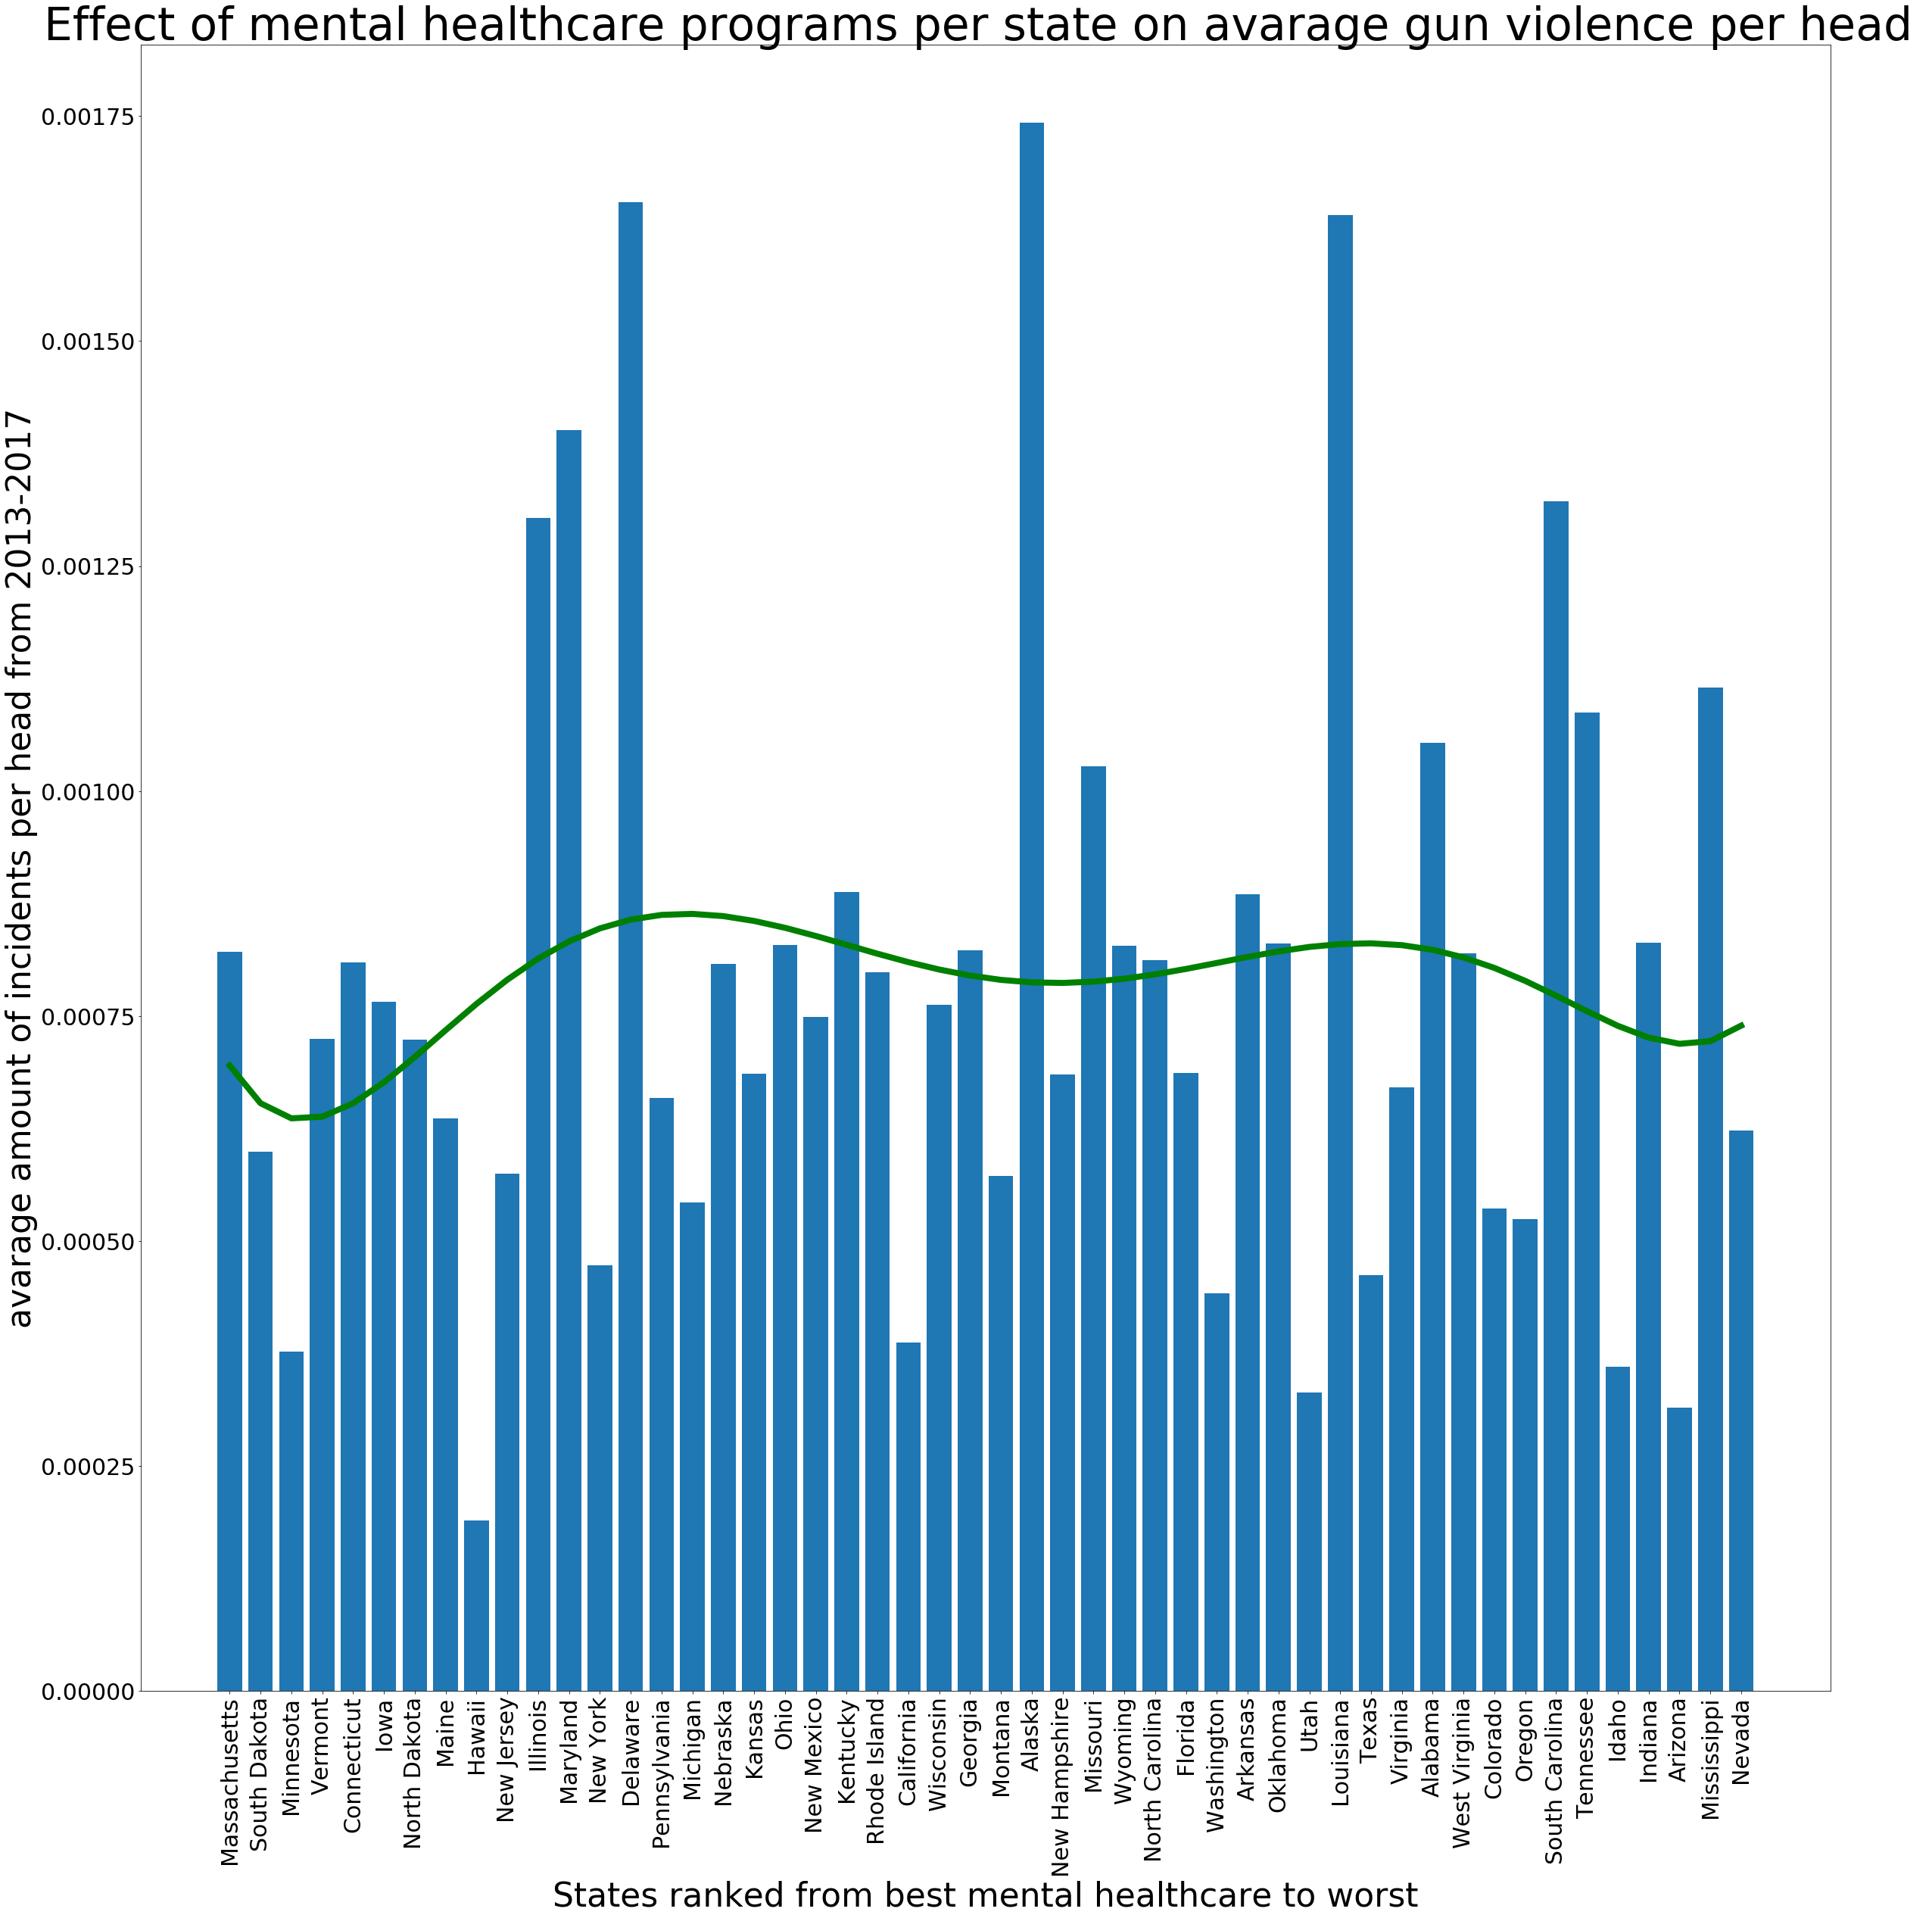

In [66]:
list_values_y = []
list_keys_x = []

for state in dfr['States']:
    list_keys_x.append(state)
    list_values_y.append(IncidentsPerHead[state])

x = list(range(50))
y = list_values_y
p2 = np.polyfit(x,y,6.5)



plt.figure(figsize=(40,40))
plt.bar(range(len(list_keys_x)), list(list_values_y), align='center')
plt.plot(x,np.polyval(p2,x),'g-',linewidth=8)
plt.yticks(size=30)

plt.xticks(range(len(list_keys_x)), list(list_keys_x), rotation='vertical',size=30)
plt.xlabel('States ranked from best mental healthcare to worst', fontsize=44)
plt.ylabel('avarage amount of incidents per head from 2013-2017', fontsize=44)
plt.title('Effect of mental healthcare programs per state on avarage gun violence per head ', fontsize=60)
plt.show()


In [68]:
incidents_per_state = {'Ohio': 10244, 'Pennsylvania': 8929, 'Oklahoma': 3455, 'Vermont': 472, 'Virginia': 5949, 'Colorado': 3201, 'South Dakota': 544, 'North Dakota': 573, 'California': 16306, 'Florida': 15029, 'Washington': 3434, 'Michigan': 6136, 'Wisconsin': 4787, 'Alabama': 5471, 'Massachusetts': 5981, 'Montana': 638, 'Oregon': 2286, 'Maryland': 8993, 'North Carolina': 8739, 'Wyoming': 494, 'Utah': 1072, 'South Carolina': 6939, 'Idaho': 661, 'Missouri': 6631, 'Kansas': 2145, 'Connecticut': 3067, 'Minnesota': 2408, 'Alaska': 1349, 'Kentucky': 4157, 'Tennessee': 7626, 'Georgia': 8925, 'New Jersey': 5387, 'Nebraska': 1651, 'Illinois': 17556, 'New Mexico': 1645, 'West Virginia': 1575, 'Maine': 907, 'Texas': 13577, 'Nevada': 1952, 'Rhode Island': 895, 'Hawaii': 289, 'Indiana': 5852, 'Iowa': 2517, 'New York': 9712, 'Arkansas': 2842, 'New Hampshire': 964, 'Delaware': 1685, 'Mississippi': 3599, 'Arizona': 2328, 'Louisiana': 8103}

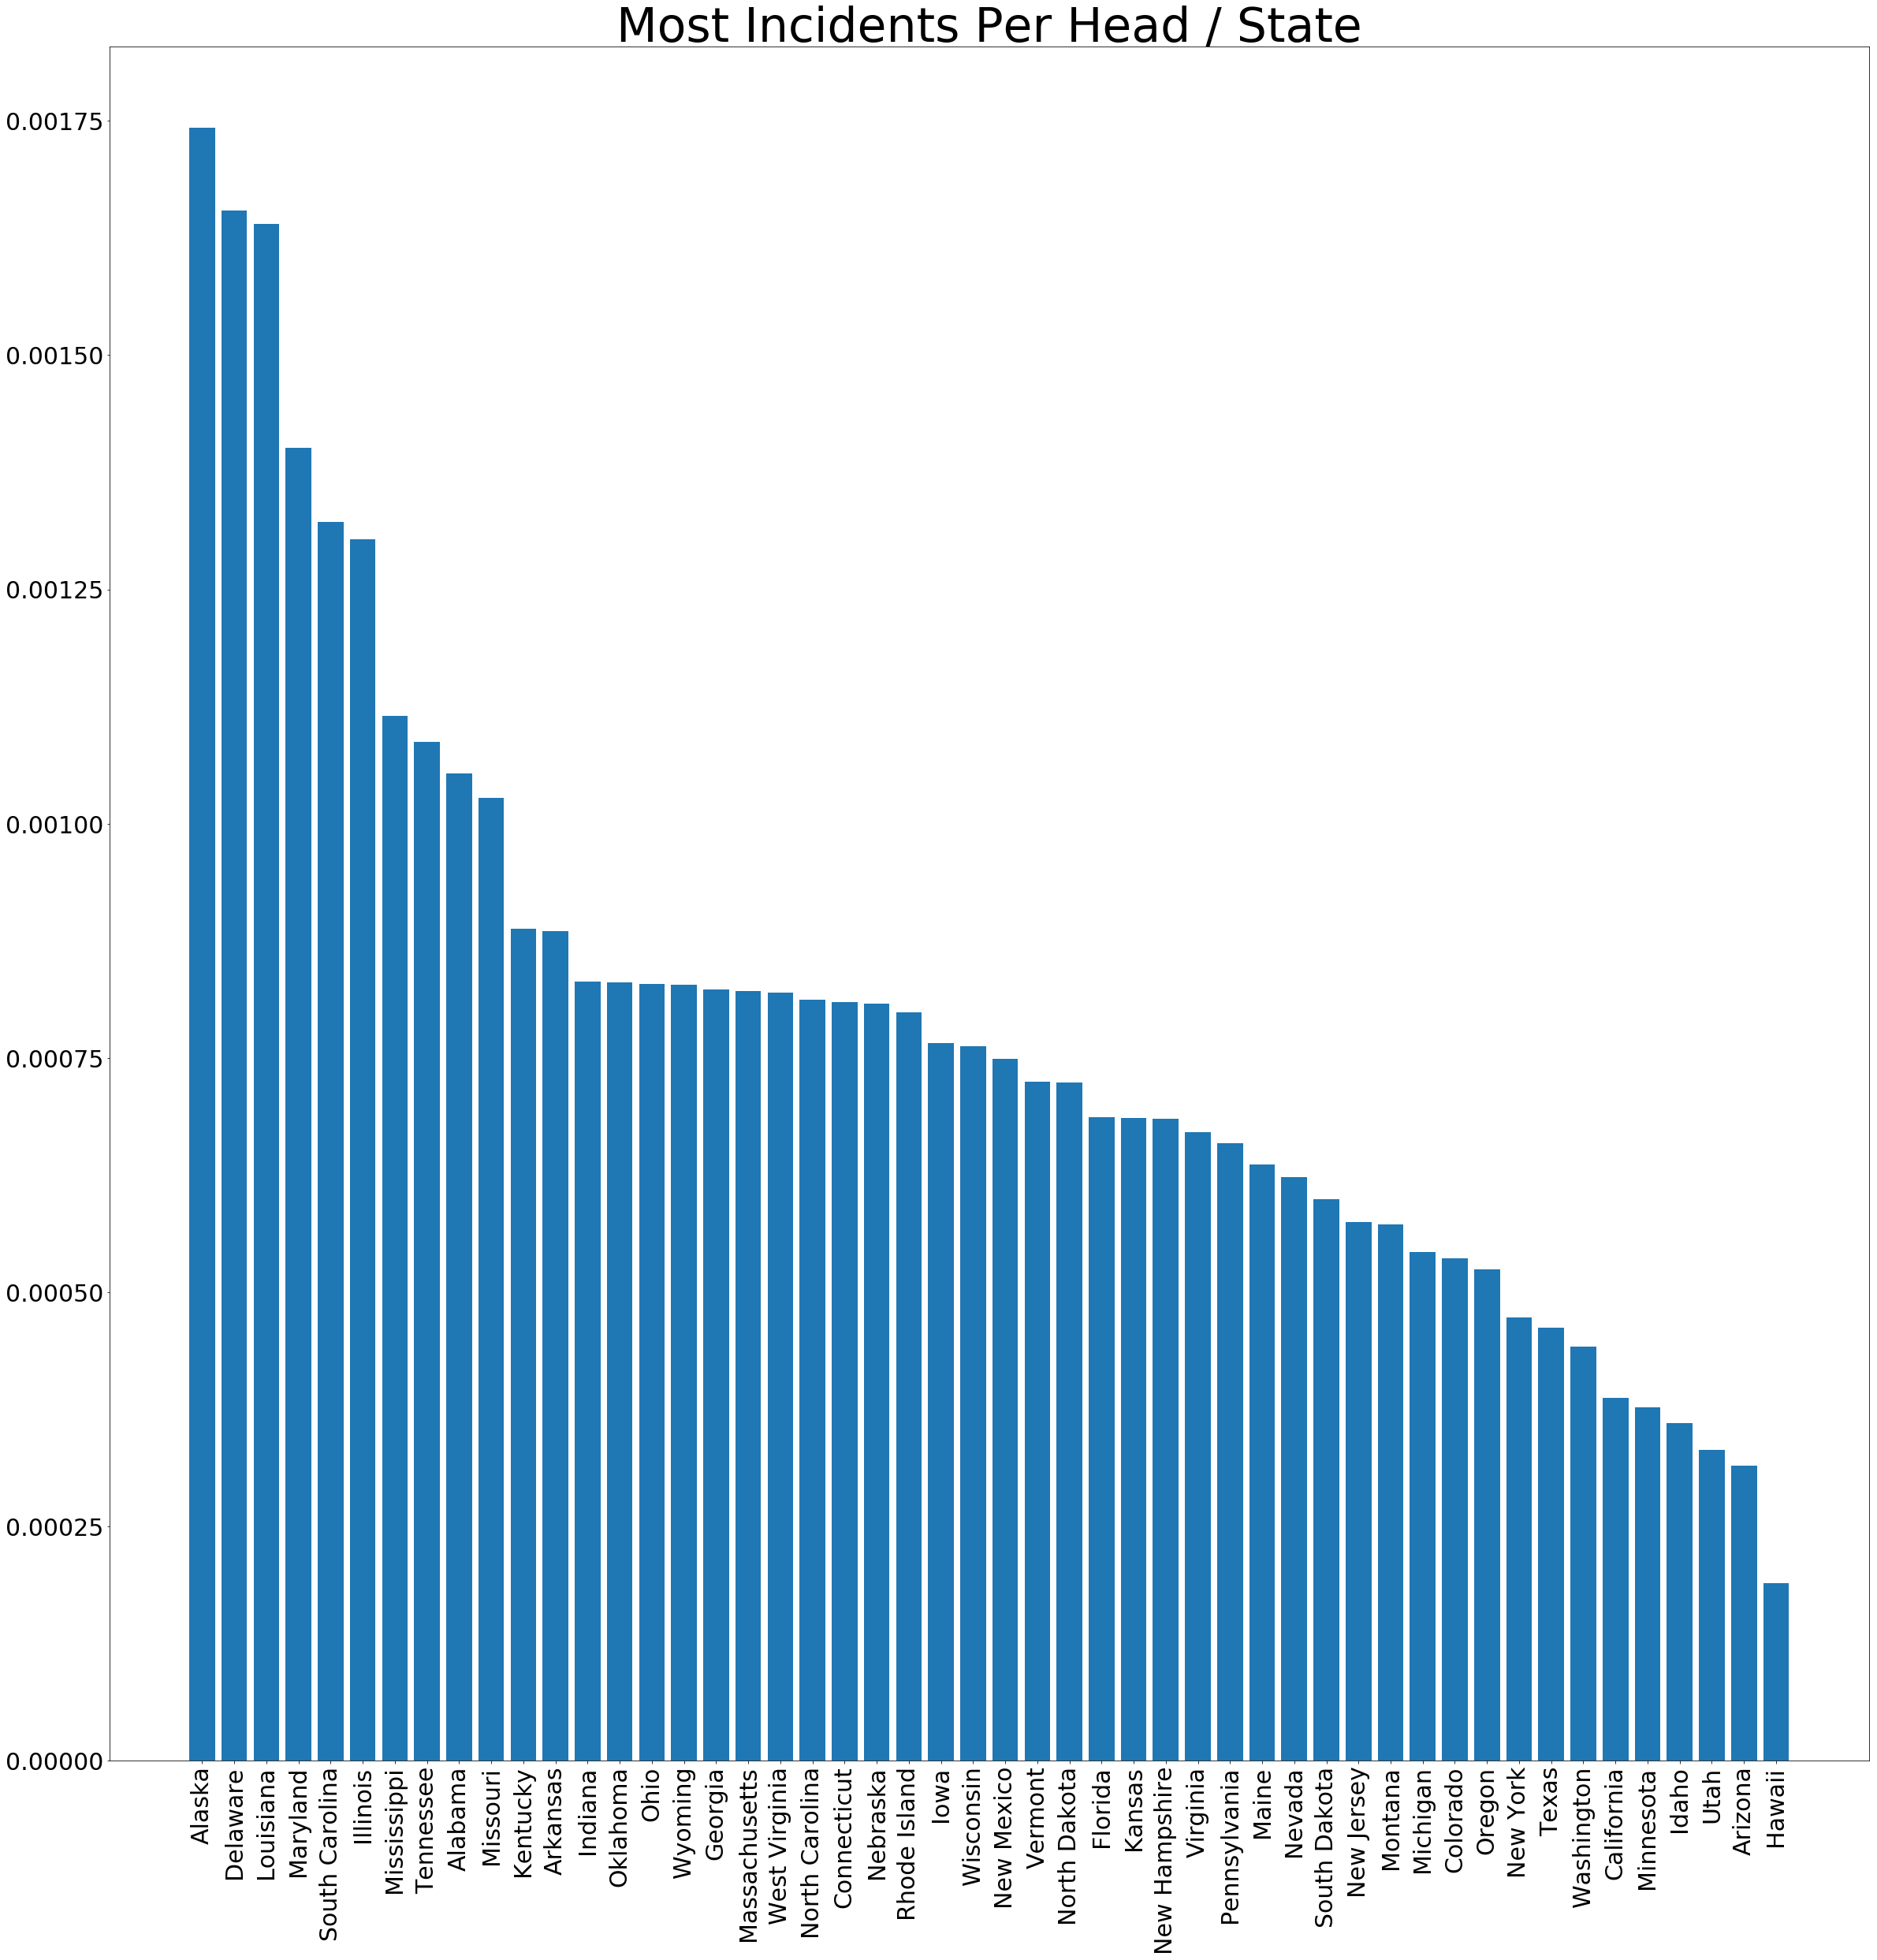

In [70]:
most_incidents_per_head = dict(reversed(sorted(IncidentsPerHead.items(), key=operator.itemgetter(1))))

list_values_y = []
list_keys_x = []

for key in most_incidents_per_head:
    list_keys_x.append(key)
    list_values_y.append(most_incidents_per_head[key])


plt.figure(figsize=(40,40))
plt.bar(range(len(list_keys_x)), list(list_values_y), align='center')
plt.yticks(size=30)
plt.xticks(range(len(list_keys_x)), list(list_keys_x), rotation='vertical',size=30)
plt.title('Most Incidents Per Head / State', fontsize=60)
plt.show()

